# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файл с данными и изучаем общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import numpy as np

In [3]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')


In [4]:
pd.set_option('display.max_columns', None) #отображаем все колонки
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info() #выводим информацию о дф

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Некоторые типы данных на первый взгляд кажутся неправильными** 
Например:
first_day_exposition — дата публикации, нужен тип datetime
is_apartment — апартаменты (булев тип) строка, нужен bool
floors_total должно быть int
и тд.


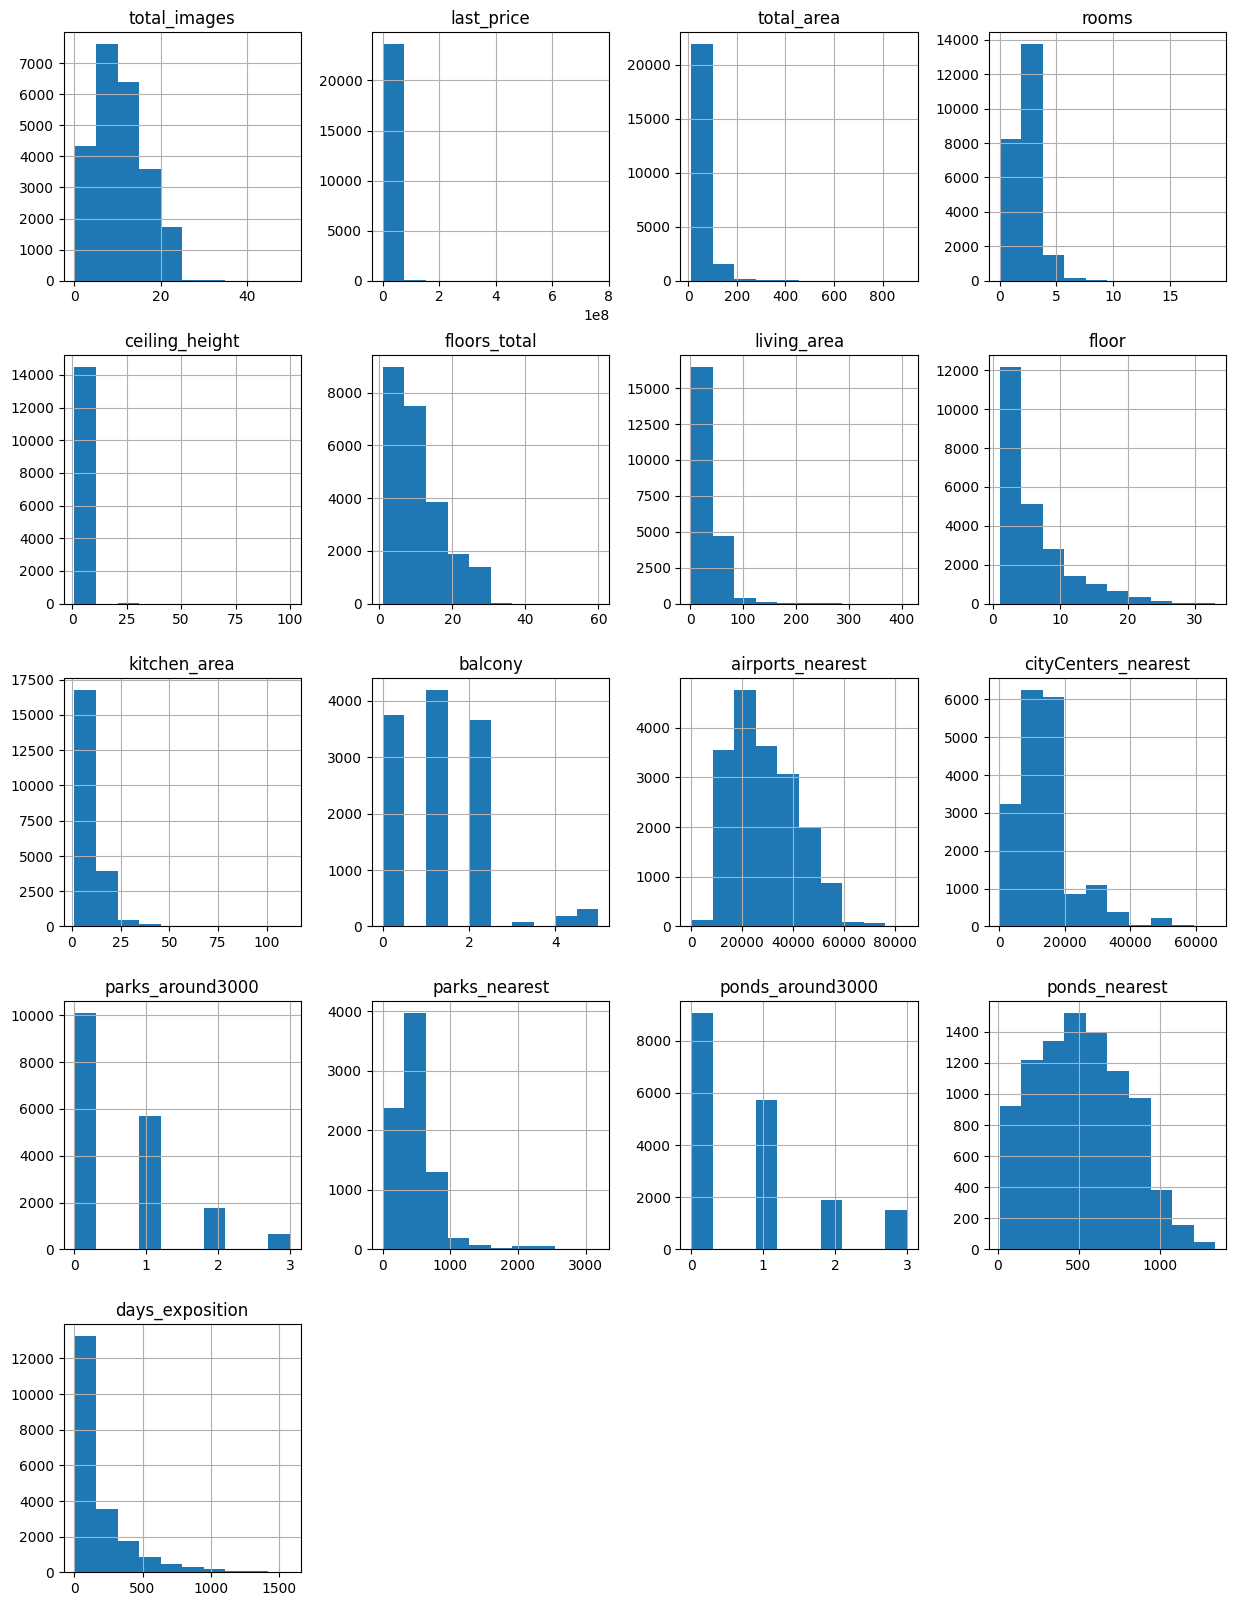

In [5]:
df.hist(figsize=(15, 20)); #';' избавимся от строчек над графиками

**Посмотрим на гистограммы**

### Предобработка данных

1 Найдите и изучите пропущенные значения в столбцах:
1.1 Определите, в каких столбцах есть пропуски.
1.2 Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
1.3 В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

In [6]:
print(df.isna().sum()) #кол-во пропущекнный значений
display (round((df.isna().sum()/len(df)*100), 1)
         .sort_values(ascending=False)) #пропущенные процентные значения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


is_apartment            88.3
parks_nearest           65.9
ponds_nearest           61.6
balcony                 48.6
ceiling_height          38.8
airports_nearest        23.4
ponds_around3000        23.3
parks_around3000        23.3
cityCenters_nearest     23.3
days_exposition         13.4
kitchen_area             9.6
living_area              8.0
floors_total             0.4
locality_name            0.2
total_images             0.0
last_price               0.0
studio                   0.0
floor                    0.0
rooms                    0.0
first_day_exposition     0.0
total_area               0.0
open_plan                0.0
dtype: float64

**удалим пропуски в floors_total и locality_name  так как их мало и они не повлияют на исследование**

**kitchen_area и living_area до 10%, оставим, на исследование не будут влиять**

Остальные пропуски обработаем


**Вызуализируем количество пропусков**

In [7]:
# check
# пропущенные значения бары + значения

def pass_value_barh(df):
    
    fig, ax = plt.subplots(figsize=(19, 6))
    
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19,6), legend=False, fontsize=16, ax = ax)
            .set_title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        );
#         plt.grid(visible=True, color='grey', linestyle='--', linewidth=0.5, alpha=0.8)
        plt.xlim(0, 100)
    
        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.1,
                     str(round((i.get_width()), 1)),
                     fontsize=14, 
                     color='black')
    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции')

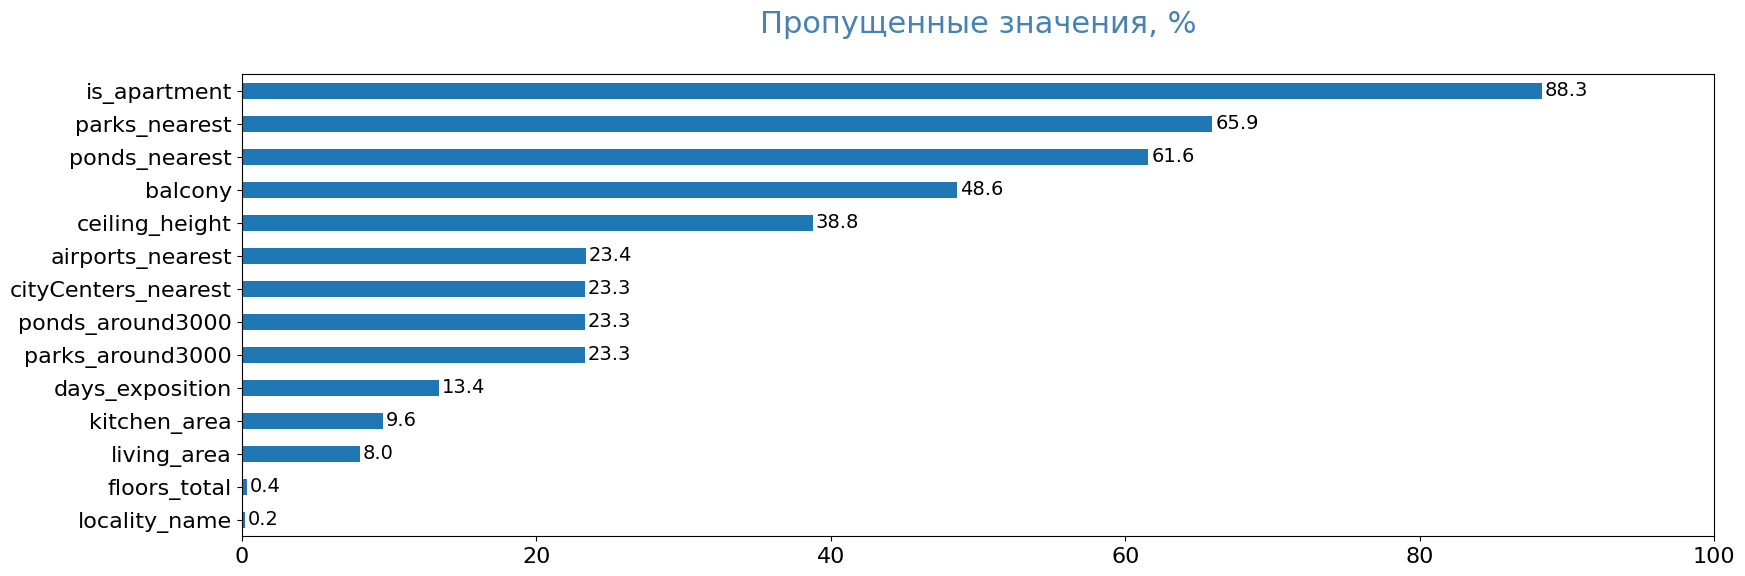

In [8]:
pass_value_barh(df)

In [9]:
#1.1
#напишем функцию, которая получает на вход название признака квартиры и возвращает число пропаущенных значений в %
def print_nan_ratio(column):
    return print('Пропущено {:.1%}'. format(df[column].isna().value_counts()[1] / len(df), 2) + ' значений')

смотрим в каких столбцах есть пропуски. 
- ceiling_height - высота потолков - обредем хвосты, 
- floors_total - всего этажей в доме - поставим среднее число, 
- living_area - жилая площадь - поставим среднее число, 
- is_apartment - апартаменты(1 или 0) - если пропуск то значит не апартаменты, 
- kitchen_area - площадь кухни - поставим среднее, 
- balcony - число балконов - не указано значит 0, 
- locality_name - название населённого пункта, 
- airports_nearest - расстояние до ближайшего аэропорта - поставим среднее, 
- cityCenters_nearest - расстояние до центра города - поставим среднее, 
- parks_nearest - расстояние до ближайшего парка - поставим среднее, 
- ponds_around3000 - число водоёмов в радиусе 3 км - не указан значит 0, 
- ponds_nearest - расстояние до ближайшего водоёма - поставим спеднее, 
- days_exposition - сколько дней было размещено объявление - не указано поставим 0


 **Пропуски в столбце is_apartment занимают самую большую долю. Посмотрим**

In [10]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False)
print(df['is_apartment'].isna().sum()) #проверяем, все ок


0


Убираем пропуски в is_apartment, пропуски заполняем False. Если продавец не указал, значит скорее всего это не апарты

**Пропуски в столбце parks_nearest составляют 65,9%. Посмотрим**

<AxesSubplot:>

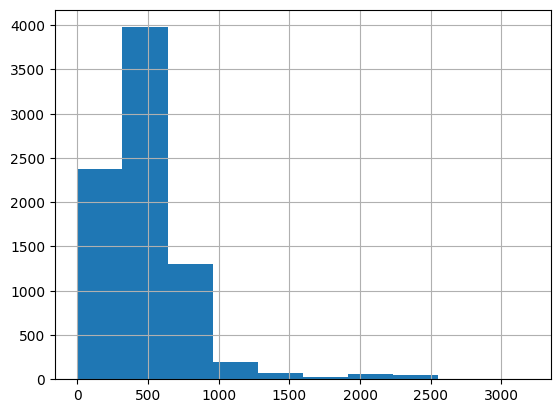

In [12]:
df['parks_nearest'].sort_values().hist()

**Люди не считают нужным заполнять этот параметр. Можно сделать его обязательным.**

In [13]:
print(df['parks_nearest'].describe())
df.loc[df['parks_nearest'].isna(), 'parks_nearest'] = df['parks_nearest'].describe()[5]
#заполним медианным значением

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


**Пропуске в столбце balcony составляют 48% и их, скорее всего, можно связать с тем, что балкона просто нет. Заполним пропуски нулем.**

In [14]:
print_nan_ratio('balcony')
df['balcony'] = df['balcony'].fillna(0)
print(df['balcony'].isna().sum()) #проверяем, все ок

Пропущено 48.6% значений
0


**Пропуски в столбце ceiling_height составляют 38,8%. Скорее всего необязательно поле для заполнения.**

Пропущено 38.8% значений


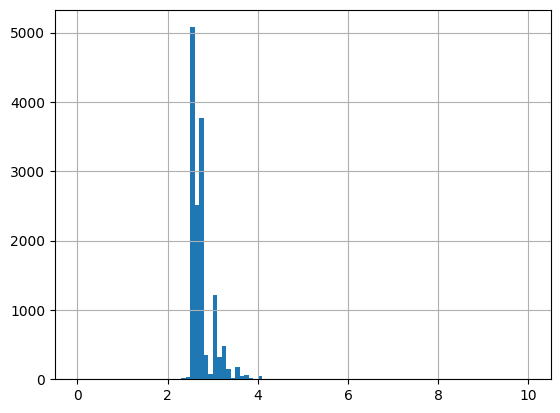

In [15]:
print_nan_ratio('ceiling_height')
df['ceiling_height'].hist(bins=100,range=(0,10));

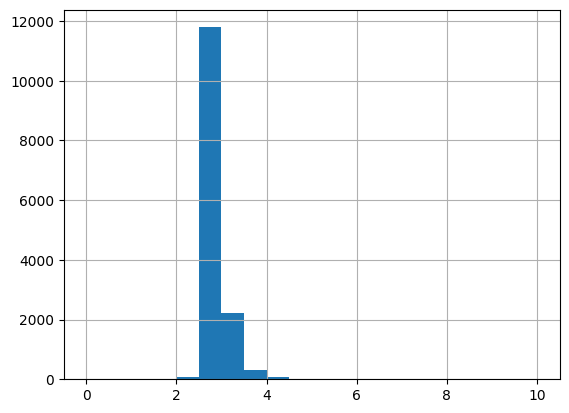

In [16]:
df['ceiling_height'].hist(bins=20, range=(0,10));

In [17]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [18]:
df[df['ceiling_height'] > 5].sort_values('ceiling_height', ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,False,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.3,5.0,NaN,5,False,False,False,NaN,0.0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,False,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,455.0,1.0,603.0,NaN
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.0,5,False,False,False,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,False,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.0,5,False,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.0,7,False,False,False,15.6,0.0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,False,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,455.0,0.0,NaN,469.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,False,False,False,8.0,0.0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,0.0,деревня Нурма,NaN,NaN,NaN,455.0,NaN,NaN,125.0


Значений, где потолки выше 5м немного

**в основном высота потолков от 2,5 до 4 метров. Пропуски заполним медианными значениями**

In [19]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)#inplace=True заменяет исходную таблицу

In [20]:
df['ceiling_height'].isna().sum()#0, все ок

0

In [21]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

**Разберемся с пропусками в стобце airports_nearest. Параметр не обзательный для заполнения скорее всего. Посмотрим**

Пропущено 23.4% значений


<AxesSubplot:>

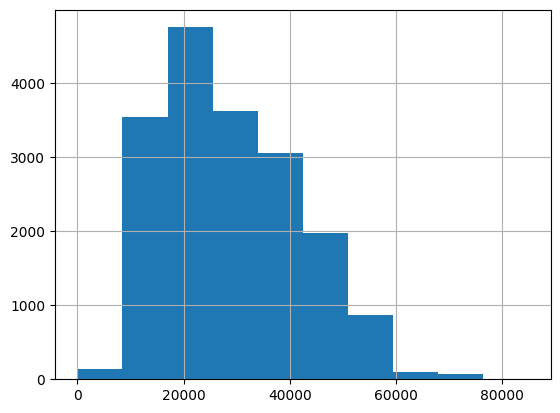

In [22]:
print_nan_ratio('airports_nearest')
df['airports_nearest'].sort_values().hist()

**Пропуски в kitchen_area и living_area не будем трогать, их 9,6% и 8% соотвественно, на исследование не повлияют**


**Строки с пустыми значениями в колонках floors_total и locality_name удалим, их очень мало**

In [23]:
df = df.dropna(subset=['floors_total', 'locality_name'])
df['floors_total'].isna().sum()
df['locality_name'].isna().sum()
#0, все ок

0

In [24]:

print_nan_ratio('parks_around3000')

print_nan_ratio('ponds_around3000')

print_nan_ratio('ponds_nearest')

print_nan_ratio('days_exposition')


Пропущено 23.3% значений
Пропущено 23.3% значений
Пропущено 61.7% значений
Пропущено 13.5% значений


**Разберемся с пропусками в parks_around3000 - число парков в радиусе 3 км**

In [25]:
print(df['parks_around3000'].value_counts())
df['parks_around3000'] = df['parks_around3000'].fillna(0)
print(df['parks_around3000'].isna().sum())


0.0    10039
1.0     5647
2.0     1736
3.0      643
Name: parks_around3000, dtype: int64
0


**считаю, что указывание парков при продаже -  это важно для недвижимости и, если не указали, значит их нет**

**Разберемся с пропусками в ponds_around3000 - число водоёмов в радиусе 3 км**

In [26]:
print(df['ponds_around3000'].value_counts())
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
print(df['ponds_around3000'].isna().sum())

0.0    9029
1.0    5662
2.0    1883
3.0    1491
Name: ponds_around3000, dtype: int64
0


**считаю, что указывание водоемов при продаже - это важно для недвижимости и, если не указали, значит их нет**

**Разберемся с пропусками в ponds_nearest - расстояние до ближайшего водоёма (м). Пропуски в 61,6% случаев. Параметр скорее всего необязательный. Люди не считают нужным указывать**

In [27]:
print(df['ponds_nearest'].describe())
df.loc[df['ponds_nearest'].isna(), 'ponds_nearest'] = df['ponds_nearest'].describe()[5]
print(df['ponds_nearest'].isna().sum()) #проверяем, все ок

count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64
0


**2 Рассмотрите типы данных в каждом столбце:
Найдите столбцы, в которых нужно изменить тип данных.
Преобразуйте тип данных в выбранных столбцах.
В ячейке с типом markdown поясните, почему нужно изменить тип данных.**

**Преобразуем и изменим типы данных**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [29]:
#меняем формат данных у first_day_exposition c float на datetime
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], 
                                           format='%Y-%m-%dT%H:%M:%S', 
                                           errors='coerce')
print(df.dtypes)


total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object


In [30]:
#floors_total привведем к целочисленному виду.
df['floors_total'] = df['floors_total'].astype('int')

In [31]:
#is_apartment привведем булеву типу данных, так как они или апарты, или нет.
df['is_apartment'] = df['is_apartment'].astype('bool')

In [32]:
#balcony привведем к целочисленному виду.
df['balcony'] = df['balcony'].astype('int')

In [33]:
#Дни привведем к целочисленному виду.
df['days_exposition'] = df['days_exposition'].astype('int',  errors='ignore')


In [34]:
#ponds_around3000 и parks_around3000 также приведем с целочисленному, чтобы не нарушать логику
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')

**3 Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.**

In [35]:
#выведем список уникальных значений столбца locality_name
print(sorted(df['locality_name'].unique()))

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',

In [36]:
names_categories = ['городской поселок ', 'городской посёлок ', 'поселок городского типа ', 
                    'деревня ', 'коттеджный ', 'городского типа ', 'посёлок ', 'поселок', 
                    'при железнодорожной станции ', 'село ', 'садовое товарищество ', 'станции ', 
                    'садоводческое некоммерческое товарищество ', 'городской ']

#напишем функцию, которая уберет тип населенного пункта

def delete_names_types (row):
    try:
        for categorie in names_categories:
            if categorie in row:
                row = row.replace(categorie, ' ')
        return row
    except:
        return row
df['locality_name_unique'] = df['locality_name'].apply(delete_names_types)
df.head(20)
    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,503.0,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,455.0,0,503.0,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,455.0,0,503.0,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,455.0,0,503.0,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,455.0,0,503.0,189.0,Мурино
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,455.0,0,503.0,289.0,Санкт-Петербург


**заменяем ё на е, чтобы убрать дубликаты посёлок и поселок**

In [37]:
df['locality_name_unique'] = df['locality_name_unique'].replace(to_replace=r'ё', 
                                                                value='е', 
                                                                regex=True) 

In [38]:
df.groupby('locality_name_unique')['locality_name_unique'].count()

locality_name_unique
   Вещево               4
   Кивеннапа Север      1
   Корнево              1
   Лужайка              1
   Приветнинское        2
                     ... 
Сосновый Бор           87
Сясьстрой              24
Тихвин                 49
Тосно                 104
Шлиссельбург           57
Name: locality_name_unique, Length: 350, dtype: int64

In [39]:
print(sorted(df['locality_name_unique'].unique()))

['   Вещево', '   Кивеннапа Север', '   Корнево', '   Лужайка', '   Приветнинское', '   Счастье', '  Аннино', '  Барышево', '  Бугры', '  Важины', '  Вещево', '  Вознесенье', '  Возрождение', '  Войсковицы', '  Володарское', '  Вырица', '  Гаврилово', '  Гарболово', '  Гладкое', '  Глажево', '  Глебычево', '  Гончарово', '  Громово', '  Дружноселье', '  Елизаветино', '  Жилгородок', '  Жилпоселок', '  Житково', '  Заводской', '  Запорожское', '  Зимитицы', '  Ильичево', '  Калитино', '  Каложицы', '  Кингисеппский', '  Кирпичное', '  Кобралово', '  Кобринское', '  Коммунары', '  Коробицыно', '  Котельский', '  Красная Долина', '  Красносельское', '  Красный Бор', '  Кузнечное', '  Кузьмоловский', '  Лебяжье', '  Лесное', '  Лисий Нос', '  Лукаши', '  Любань', '  Мга', '  Мельниково', '  Мичуринское', '  Молодцово', '  Мурино', '  Новый Свет', '  Новый Учхоз', '  Оредеж', '  Павлово', '  Пансионат Зеленый Бор', '  Первомайское', '  Перово', '  Петровское', '  Победа', '  Поляны', '  Поч

In [40]:
df.locality_name_unique.nunique()

350

Удалим пробелы

In [41]:
df['locality_name_unique'] = df['locality_name_unique'].replace(r'\s+','',regex=True)

In [42]:
print(sorted(df['locality_name_unique'].unique()))

['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'БольшаяВруда', 'БольшаяИжора', 'БольшаяПустомержа', 'БольшиеКолпаны', 'БольшоеРейзино', 'БольшойСабск', 'Бор', 'БорисоваГрива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'ВахноваКара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'ДружнаяГорка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичево', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', 'Каськово', 'Келози', 'Ки

In [43]:
# check
df.locality_name_unique.nunique()

305

**4 Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.**

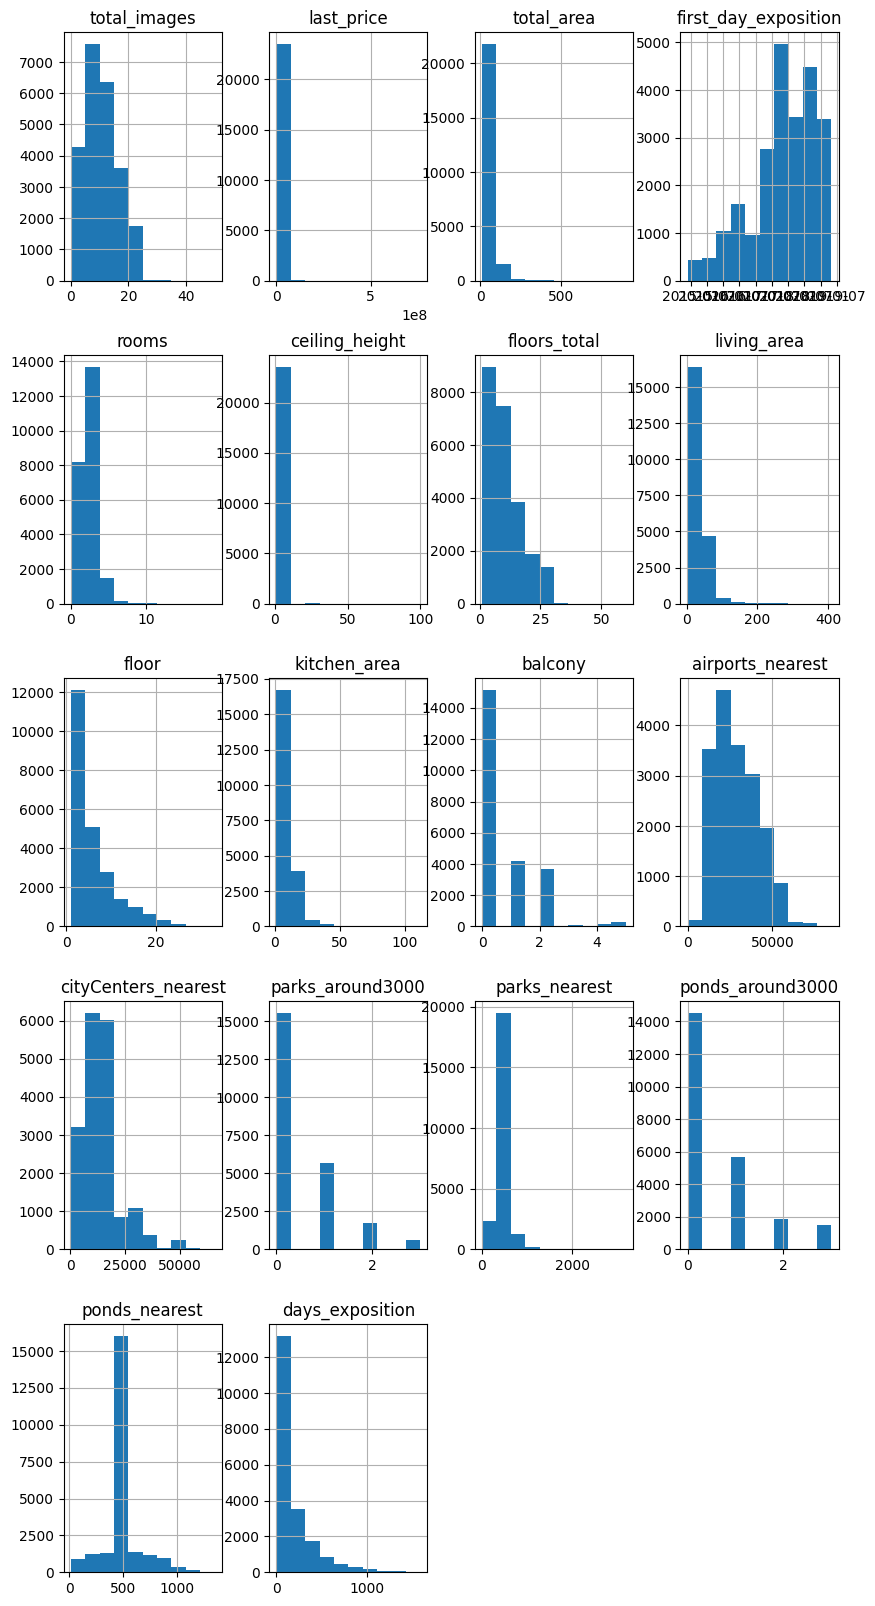

In [44]:
df.hist(figsize=(10,20));

**столбец ceiling_height**

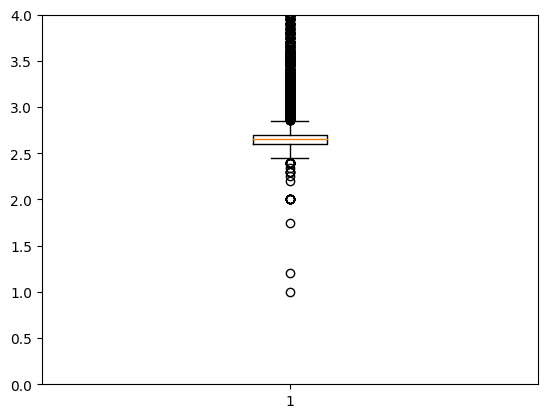

In [45]:
plt.ylim(0, 4)
plt.boxplot(x=df['ceiling_height']);

In [46]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [47]:
df = df[(df['ceiling_height'] > 2.45) & (df['ceiling_height'] < 3.5)]

In [48]:
df['ceiling_height'].describe()

count    23074.000000
mean         2.679378
std          0.165331
min          2.460000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

**Потеря всего 2%. Но зато так мы сохраним объекты недвижимости из старого фонда по Спб. В интернете сказано, что выше 3.5 метров редкость**


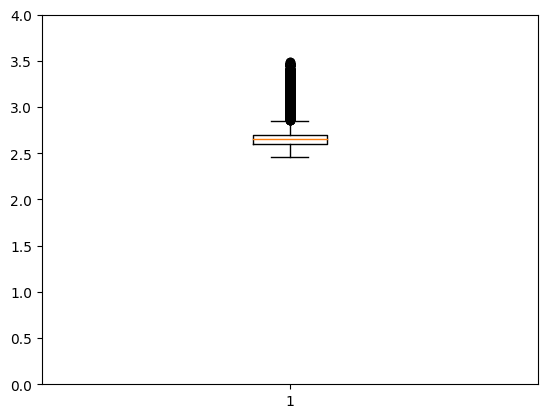

In [49]:
plt.ylim(0, 4)
plt.boxplot(x=df['ceiling_height']);

**столбец last_price**

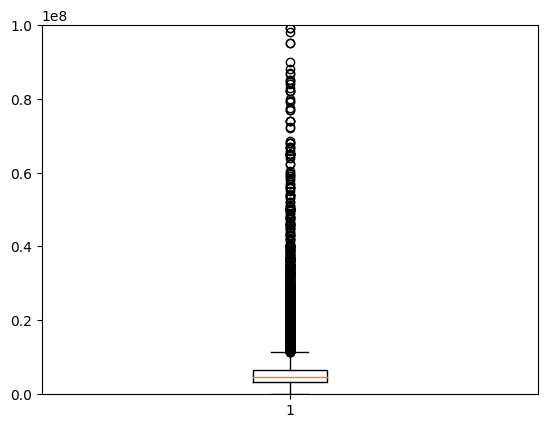

In [50]:
plt.ylim(0, 100000000)
plt.boxplot(x=df['last_price']);

In [51]:
df['last_price'].describe().round()

count        23074.0
mean       6301595.0
std       10133268.0
min          12190.0
25%        3400000.0
50%        4600000.0
75%        6650000.0
max      763000000.0
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

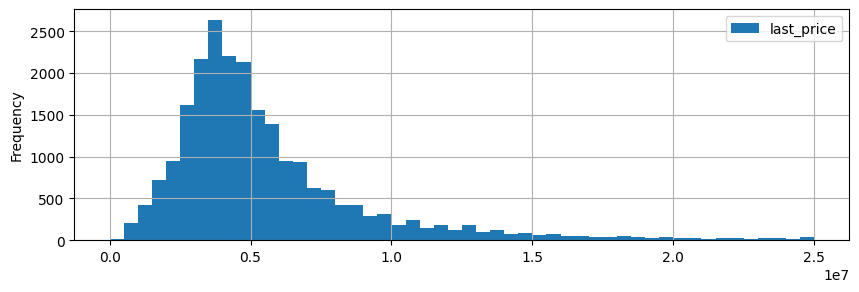

In [52]:
df.plot(y='last_price', kind='hist', bins=50, grid=True, range=(0, 25000000), figsize=(10,3))

Большинство квартир в среднем стоят до 5,5 млн, есть аномалии как 763 млн

Выведем наибольшие варианты по цене

In [53]:
df['last_price'].sort_values(ascending=False).head(20)

12971    763000000.0
19540    420000000.0
14706    401300000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
19155    160000000.0
16495    159000000.0
15016    150000000.0
7857     150000000.0
22229    148000000.0
12674    140000000.0
3117     140000000.0
17912    135000000.0
793      135000000.0
2243     130278280.0
7543     130000000.0
Name: last_price, dtype: float64

In [54]:
df['last_price'].sort_values(ascending=True).head(20)

8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
9581     450000.0
16219    450000.0
5698     450000.0
17676    450000.0
21912    470000.0
18867    470000.0
23484    470000.0
16032    480000.0
6859     490000.0
10782    490000.0
14904    500000.0
2097     500000.0
14295    500000.0
4405     500000.0
22430    520000.0
12607    530000.0
Name: last_price, dtype: float64

Выведем наименьшие варианты по цене

**Данные распределяются нормально, не будем их трогать**

In [55]:
df = df[(df['last_price'] > 400000) & (df['last_price'] < 25000000)]
df['last_price'].describe().round()

count       22659.0
mean      5504589.0
std       3506231.0
min        430000.0
25%       3400000.0
50%       4550000.0
75%       6500000.0
max      24900000.0
Name: last_price, dtype: float64

Потеря данных небольшая, для целей исследования подойдет

<AxesSubplot:ylabel='Frequency'>

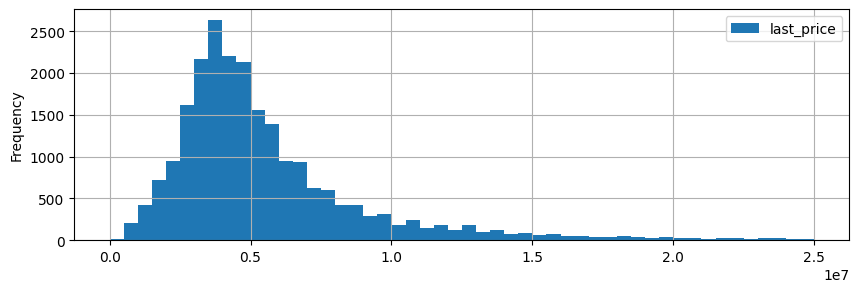

In [56]:
# check
df.plot(y='last_price', kind='hist', bins=50, grid=True, figsize=(10,3), range=(0,25000000))

**столбец total_area**

<AxesSubplot:ylabel='Frequency'>

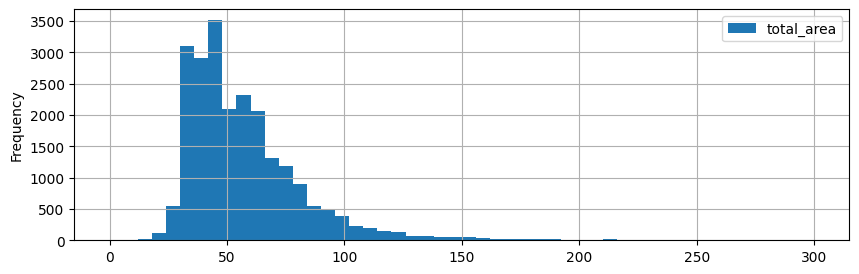

In [57]:
df.plot(y='total_area', kind='hist', bins=50, grid=True, figsize=(10,3), range=(0,300))

**В основном квартиры имеют площадь от 20 до 150 кв метров. Остальное аномалии, их можно убрать по аналогии с ценой**

In [58]:
df = df[(df['total_area'] > 20) & (df['total_area'] < 250)]
df['total_area'].describe().round()

count    22610.0
mean        57.0
std         25.0
min         20.0
25%         40.0
50%         51.0
75%         67.0
max        250.0
Name: total_area, dtype: float64

Потеря данных небольшая, для целей исследования подойдет

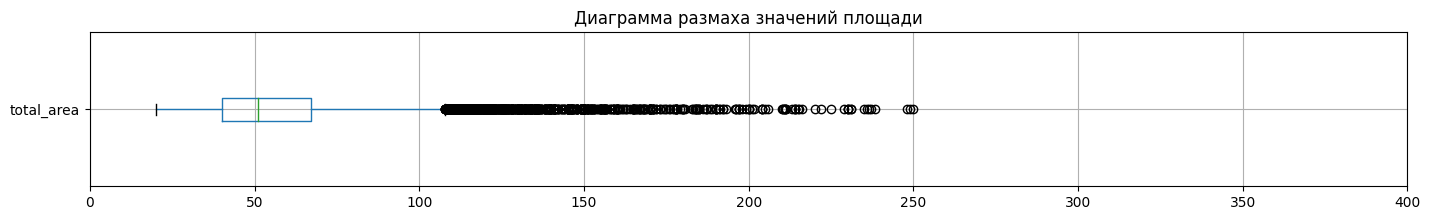

In [59]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = df[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

**столбец rooms**

{'whiskers': [<matplotlib.lines.Line2D at 0x1452f2100>,
 'caps': [<matplotlib.lines.Line2D at 0x14562f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1452f2e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1455b4040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1455b4760>],
 'means': []}

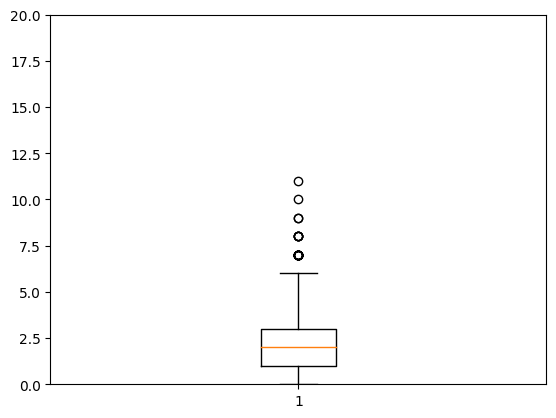

In [60]:
plt.ylim(0, 20)
plt.boxplot(x=df['rooms'])

In [61]:
rooms_Q1 = df['rooms'].quantile(0.25)
rooms_Q3 = df['rooms'].quantile(0.75)
rooms_IQR = rooms_Q3 - rooms_Q1
rooms_lower = rooms_Q1 - 1.5*rooms_IQR
rooms_upper = rooms_Q3 + 1.5*rooms_IQR
df['rooms'].clip(lower=rooms_lower, upper=rooms_upper, inplace=True)

/Users/forcemajor01/opt/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/pandas/core/generic.py:7711: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._clip_with_scalar(lower, upper, inplace=inplace)


{'whiskers': [<matplotlib.lines.Line2D at 0x1456568b0>,
 'caps': [<matplotlib.lines.Line2D at 0x145656a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1456567f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1457aed00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1457aeac0>],
 'means': []}

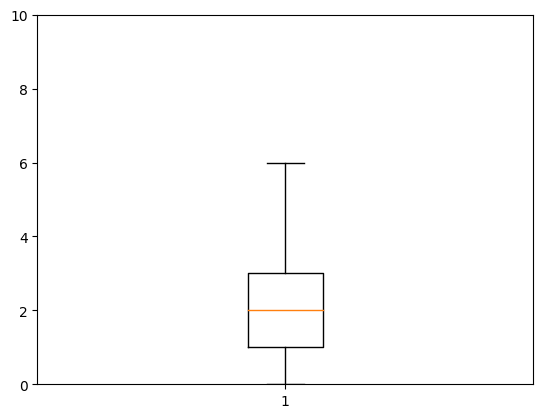

In [62]:
plt.ylim(0, 10)
plt.boxplot(x=df['rooms'])

#### check gap

In [63]:
# check
data = df.copy()

In [64]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22610 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22610 non-null  int64         
 1   last_price            22610 non-null  float64       
 2   total_area            22610 non-null  float64       
 3   first_day_exposition  22610 non-null  datetime64[ns]
 4   rooms                 22610 non-null  int64         
 5   ceiling_height        22610 non-null  float64       
 6   floors_total          22610 non-null  int64         
 7   living_area           20843 non-null  float64       
 8   floor                 22610 non-null  int64         
 9   is_apartment          22610 non-null  bool          
 10  studio                22610 non-null  bool          
 11  open_plan             22610 non-null  bool          
 12  kitchen_area          20506 non-null  float64       
 13  balcony         

In [65]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,610.00","22,610.00","22,610.00","19,660.00","22,610.00","20,843.00","20,506.00","22,610.00","22,610.00"
min,0.00,20.10,2.46,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,6.00,249.90,3.49,"1,580.00","24,900,000.00",180.00,70.00,33.00,60.00


{'whiskers': [<matplotlib.lines.Line2D at 0x144e0a520>,
 'caps': [<matplotlib.lines.Line2D at 0x144e13e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x144e0a880>],
 'medians': [<matplotlib.lines.Line2D at 0x144e13760>],
 'fliers': [<matplotlib.lines.Line2D at 0x144e13400>],
 'means': []}

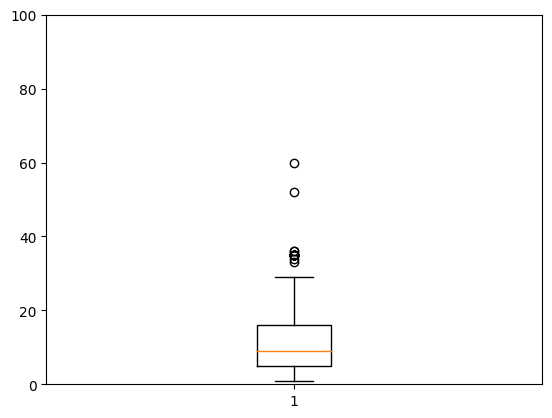

In [66]:
plt.ylim(0, 100)
plt.boxplot(x=df['floors_total'])

Видим аномальные значения в районе 50 и 60 этажей

In [67]:
df['floors_total'].describe()

count    22610.000000
mean        10.823441
std          6.629432
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [68]:
floors_total_Q1 = df['floors_total'].quantile(0.25)
floors_total_Q3 = df['floors_total'].quantile(0.75)
floors_total_IQR = floors_total_Q3 - floors_total_Q1
floors_total_lower = floors_total_Q1 - 1.5*floors_total_IQR
floors_total_upper = floors_total_Q3 + 1.5*floors_total_IQR
df['floors_total'].clip(lower=floors_total_lower, upper=floors_total_upper, inplace=True)



{'whiskers': [<matplotlib.lines.Line2D at 0x1457ae5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1452ac0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x144cdefd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1453e7730>],
 'fliers': [<matplotlib.lines.Line2D at 0x145210340>],
 'means': []}

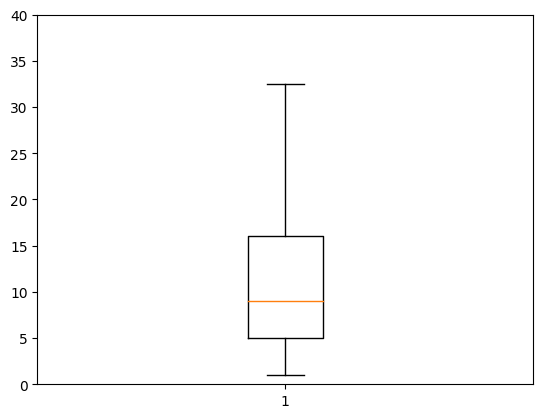

In [69]:
plt.ylim(0, 40)
plt.boxplot(x=df['floors_total'])

Я думаю, что тут мы можем применить clip, так как данные не созависимые с другими, как в случае last_price

**Исправим аномалии в столбец kitchen_area**

In [70]:
df['kitchen_area'].describe()

count    20506.000000
mean        10.154564
std          4.851003
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         70.000000
Name: kitchen_area, dtype: float64

#### check nan

In [71]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22610 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22610 non-null  int64         
 1   last_price            22610 non-null  float64       
 2   total_area            22610 non-null  float64       
 3   first_day_exposition  22610 non-null  datetime64[ns]
 4   rooms                 22610 non-null  int64         
 5   ceiling_height        22610 non-null  float64       
 6   floors_total          22610 non-null  float64       
 7   living_area           20843 non-null  float64       
 8   floor                 22610 non-null  int64         
 9   is_apartment          22610 non-null  bool          
 10  studio                22610 non-null  bool          
 11  open_plan             22610 non-null  bool          
 12  kitchen_area          20506 non-null  float64       
 13  balcony         

In [72]:
df = df[((df['kitchen_area'] > 3.7) & (df['kitchen_area'] < 56))|(df['kitchen_area'].isnull())]

Придержимаемся такой же логики, как и в total_area, что если мы используем функцию clip, то уйберем квартиры, которые стоят дорого, но кухни маленькие будут

**Добавили новое условие оставить пропущенные значения**

In [73]:
# check
df.shape[0]

22583

In [74]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [75]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


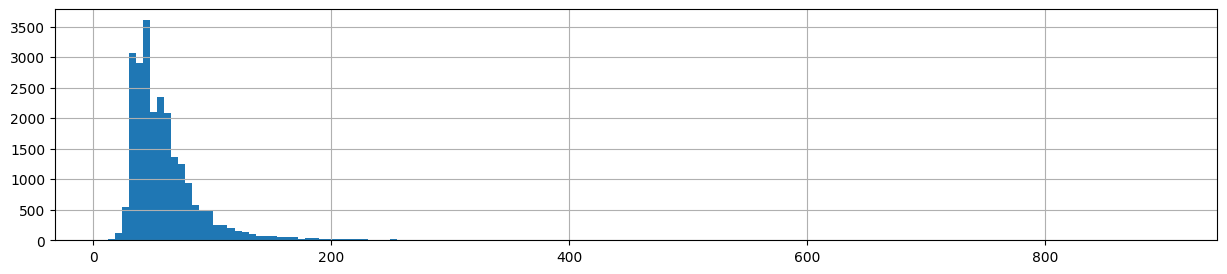

In [76]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий</b></font>
    <br /> 
    <font size="3", color = "black">
<br />т.е. все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями
       

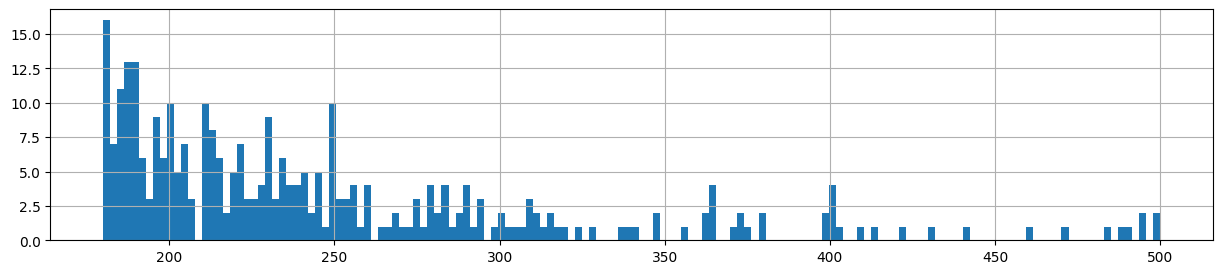

In [77]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

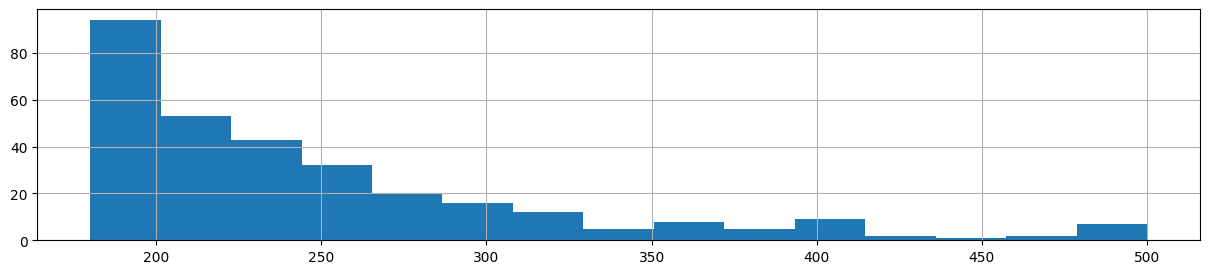

In [78]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

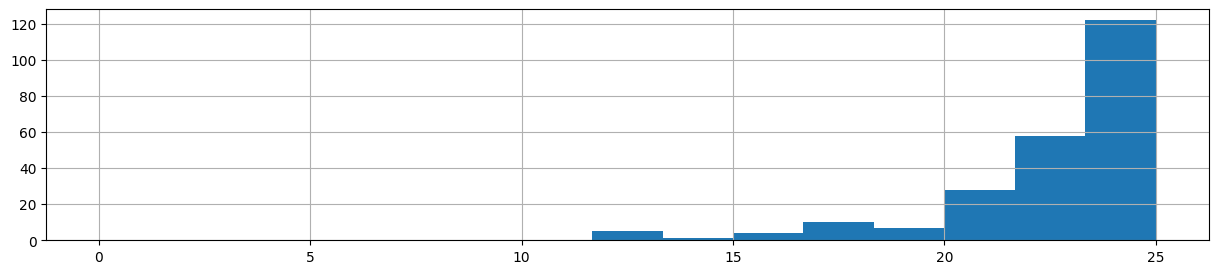

In [79]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

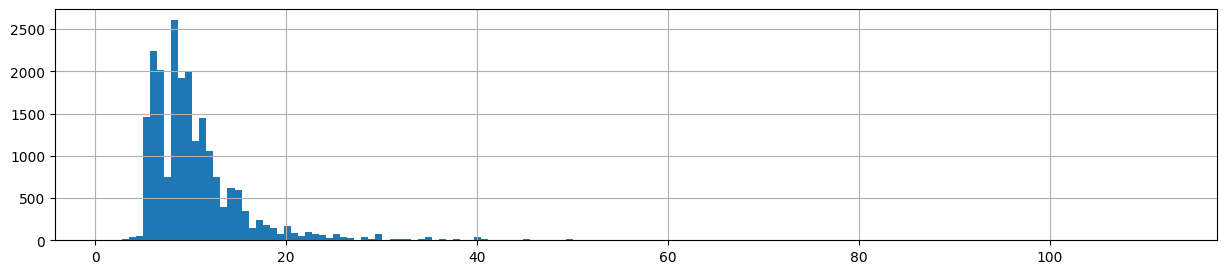

In [80]:
# check
df_check.kitchen_area.hist(bins = 150, figsize = (15,3));

Т.Е. все квартиры, площадь кухни которых менее 4 и более 50 кв. м. можно считать аномалиями. Уберем хвосты

In [81]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,22.00,2.50,3.00,"566,962.00",10.00,4.00,1.00,2.00
0.01,1.00,26.00,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,51.00,2.65,94.00,"4,550,000.00",30.00,9.00,4.00,9.00
0.99,5.00,149.00,3.30,"1,054.41","19,500,000.00",90.00,30.00,23.00,26.00
0.9988,6.00,210.92,3.40,"1,361.41","23,978,228.00",140.00,46.00,26.00,34.87


In [82]:
# check

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,583.00","22,583.00","22,583.00","19,637.00","22,583.00","20,816.00","20,479.00","22,583.00","22,583.00"
min,0.00,20.10,2.46,1.00,"430,000.00",2.00,3.80,1.00,1.00
max,6.00,249.90,3.49,"1,580.00","24,900,000.00",180.00,55.70,33.00,32.50


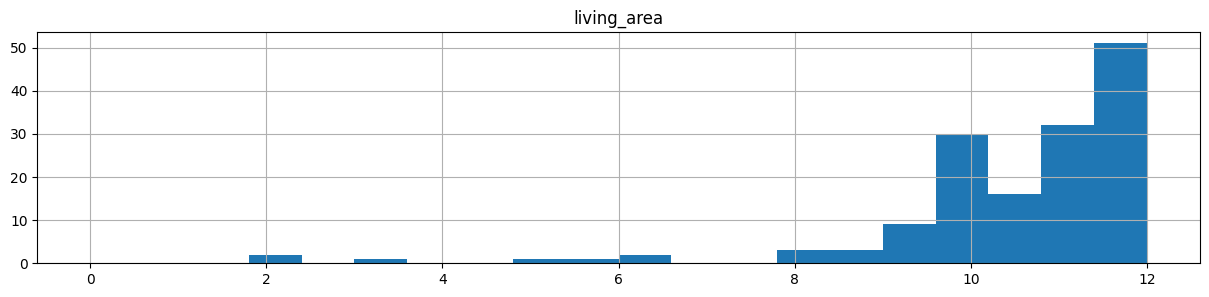

In [83]:
# check
df.hist(column = 'living_area', bins = 20, figsize = (15,3), range = (0,12));

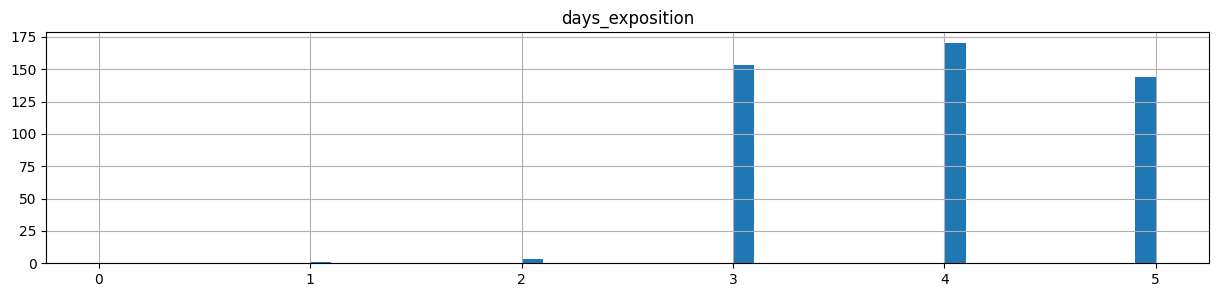

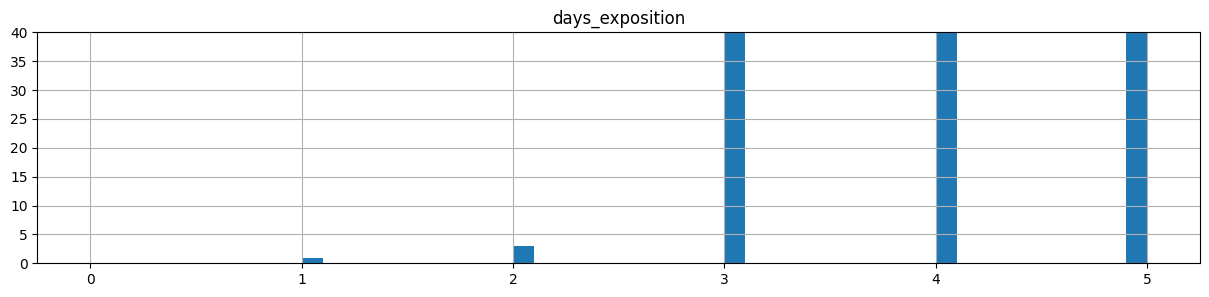

In [84]:
# check
df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

**Избавимся от аномали в колонках days_exposition и living_area**

In [85]:
(
    data[['days_exposition','living_area']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,days_exposition,living_area
0.0012,3.00,10.00
0.01,4.00,13.00
0.5,94.00,30.00
0.99,"1,054.41",90.00
0.9988,"1,361.41",140.00


**days_exposition**

In [86]:
df['days_exposition'].describe()

count    19637.000000
mean       177.769109
std        216.557358
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

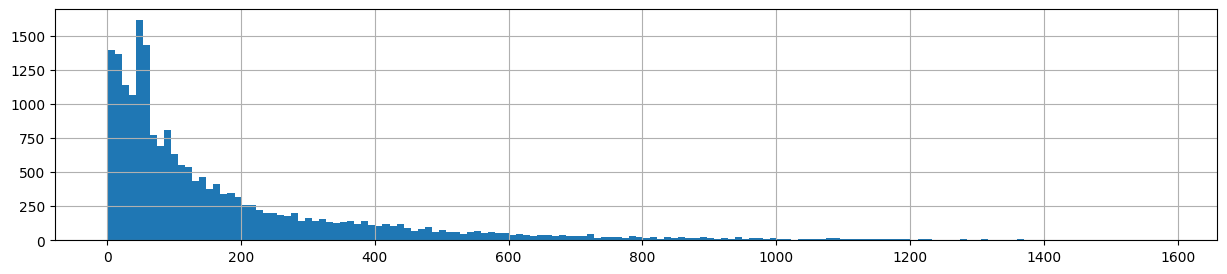

In [87]:
df_check.days_exposition.hist(bins=150, figsize=(15,3));

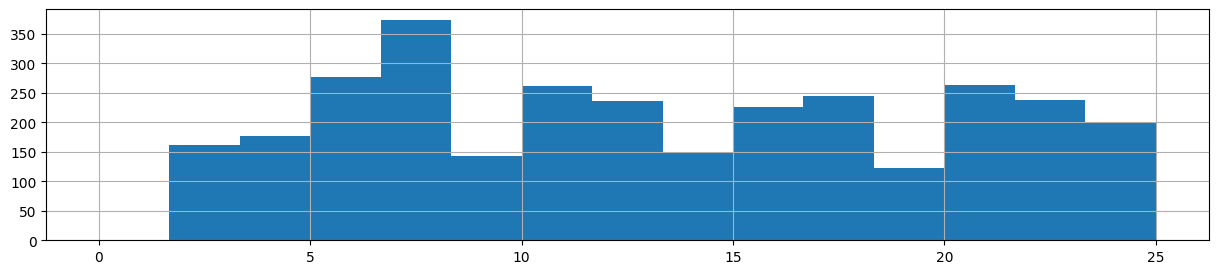

In [88]:
df_check.days_exposition.hist(bins = 15, figsize = (15,3), range = (0,25));

Т.Е. все продажи более 1300 дней можно считать аномалиями. Уберем хвосты

**добавим фильтрацию по 0.0012 квантилю и 0.9988, оставим пропуски**

In [89]:
df = df[((df['days_exposition'] > 3) & (df['days_exposition'] < 1360))|(df['days_exposition'].isnull())]

In [90]:
df['days_exposition'].describe()

count    19607.000000
mean       176.130158
std        211.752135
min          3.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1355.000000
Name: days_exposition, dtype: float64

**living_area**

In [91]:
df['living_area'].describe()

count    20790.000000
mean        32.488979
std         16.535611
min          2.000000
25%         18.500000
50%         30.000000
75%         41.300000
max        180.000000
Name: living_area, dtype: float64

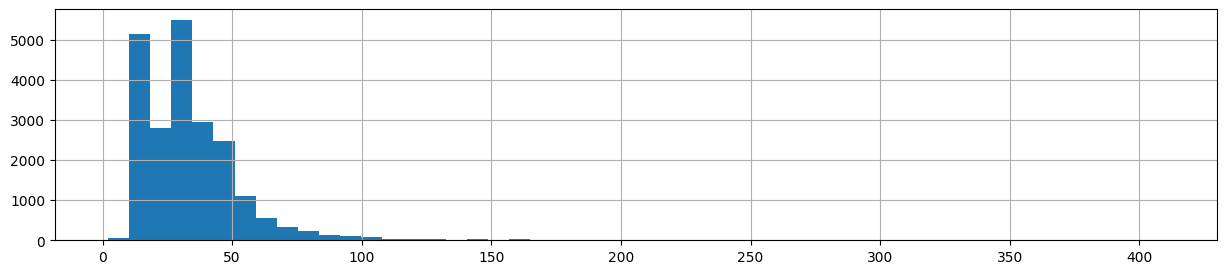

In [92]:
df_check.living_area.hist(bins=50, figsize=(15,3));

**Значения менее 10 и более 140 можно считать редкостью. Уберем и оставим пропущенные**

In [93]:
df = df[((df['living_area'] > 10) & (df['living_area'] < 140))|(df['living_area'].isnull())]

In [94]:
df['living_area'].describe()

count    20711.000000
mean        32.376524
std         15.886225
min         10.080000
25%         18.500000
50%         30.000000
75%         41.200000
max        138.800000
Name: living_area, dtype: float64

### Посчитайте и добавьте в таблицу новые столбцы

# Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [95]:
#цена одного квадратного метра
df['one_meter_price'] = df['last_price']/df['total_area']
print(df['one_meter_price'])

0        120370.370370
1         82920.792079
2         92785.714286
4        100000.000000
5         95065.789474
             ...      
23693     73717.948718
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: one_meter_price, Length: 22474, dtype: float64


In [96]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [97]:
#месяц публикации объявления;
df['month_exposition'] = df['first_day_exposition'].dt.month
print(df['month_exposition'].head(10))

0      3
1     12
2      8
4      6
5      9
6     11
7      4
8      5
9      2
10    11
Name: month_exposition, dtype: int64


In [98]:
#год публикации объявления;
df['year_exposition'] = df['first_day_exposition'].dt.year

In [99]:
#тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor_categorize (row):
    floors_total = row['floors_total']
    floor = row['floor']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        elif 1 < floor < floors_total:
            return 'другой'
    except:
        pass
df['floor_type'] = df.apply(floor_categorize, axis=1)

In [100]:
df['floor_type'].head(20)

0        другой
1        первый
2        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
15       другой
16       первый
17       другой
18       другой
19       другой
20       другой
Name: floor_type, dtype: object

In [101]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
df['distance_to_centre'] = round(df['cityCenters_nearest'] / 1000)
df['distance_to_centre']

0        16.0
1        19.0
2        14.0
4         8.0
5         NaN
         ... 
23693    34.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: distance_to_centre, Length: 22474, dtype: float64

### Проведите исследовательский анализ данных

**Изучите следующие параметры объектов:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.**

**общая площадь**

<AxesSubplot:ylabel='Frequency'>

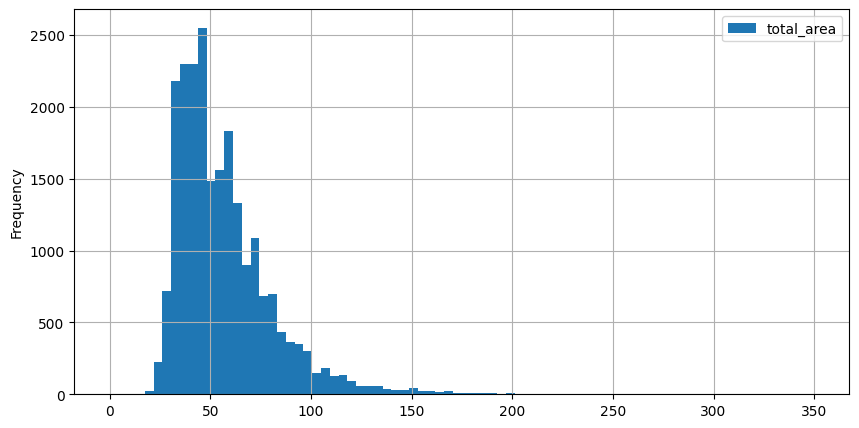

In [102]:
df.plot(y='total_area', kind='hist', bins=80, grid=True, figsize=(10,5), range=(0,350))

Данные распределены нормально, есть небольшие выбросы в районе 110 кв.м, они не повлияют на общую статистику. Пик значений приходится на 50кв.м

**жилая площадь**

<AxesSubplot:>

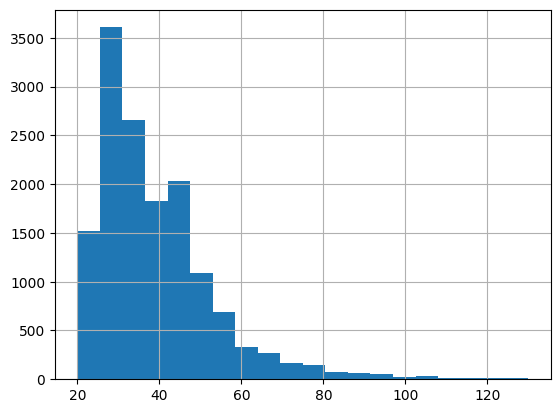

In [103]:
df['living_area'].hist(bins=20, range=(20,130))

График принимает форму перекоса влево с пиковым значением на 30 метрах и длинным хвостом от 80 м.

**площадь кухни**

<AxesSubplot:>

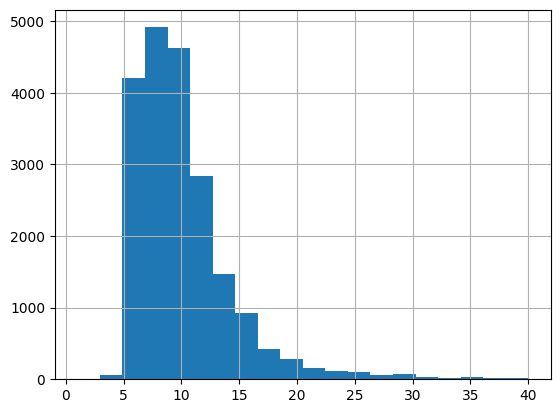

In [104]:
df['kitchen_area'].hist(bins=20,range=(1,40)) 

в среднем строки принимают значения в райлне 5-10 кв.м Длинный хвост после 20

**Цена объекта**

4948     24900000.0
18977    24900000.0
6991     24821600.0
18386    24800000.0
23281    24800000.0
14099    24719904.0
7428     24700000.0
17563    24500000.0
8709     24500000.0
23185    24500000.0
Name: last_price, dtype: float64

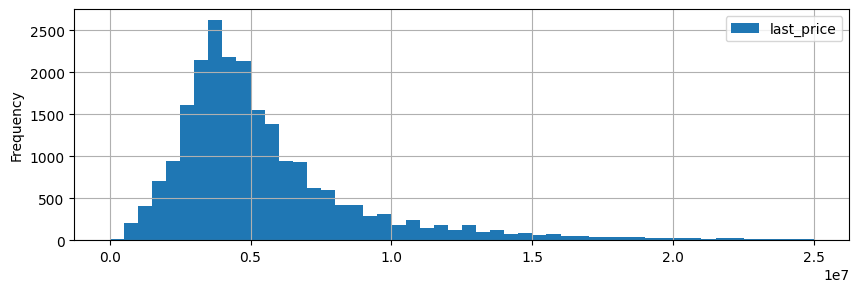

In [105]:
df.plot(y='last_price', kind='hist', bins=50, grid=True, figsize=(10,3), range=(0,25000000))
df['last_price'].sort_values(ascending=False).head(10)

Гистрограмма имеет форму колокола, пик на о.4, все ок, есть редкие значение более 15млн, а также аномалии, такие как 763 млн

**количество комнат**

<AxesSubplot:ylabel='Frequency'>

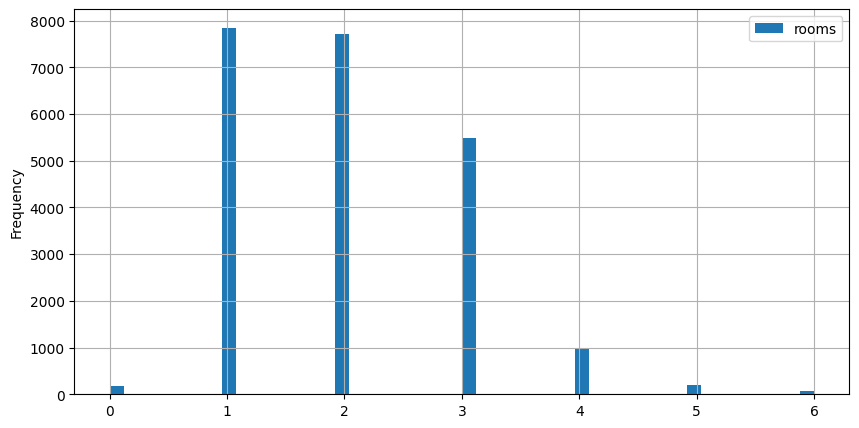

In [106]:
df.plot(y='rooms', kind='hist', bins=50, grid=True, figsize=(10,5))

в основном в квартирах из дф от 1 до 4 комнат. 0, 5 и 6 это аномалии

**высота потолков**

<AxesSubplot:ylabel='Frequency'>

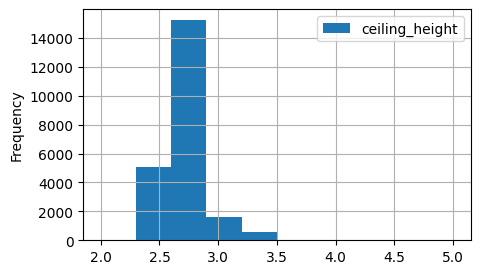

In [107]:
df.plot(y='ceiling_height', kind='hist', bins=10, grid=True, figsize=(5,3), range=(2,5))

в основном квартиры из дф имеют высоту потолков от 2,5 до 3м. Более 3,5 метров мы ограничили потолким, так как их было немного

<AxesSubplot:>

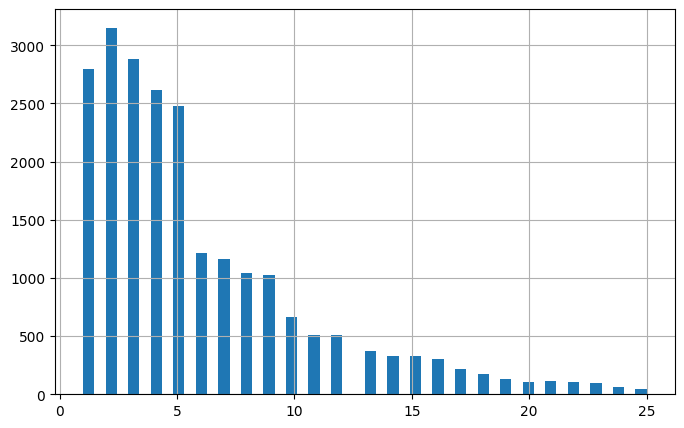

In [108]:
df['floor'].hist(bins=50, range=(1, 25), figsize=(8,5))

подавляющая часть квартир находится на 1-5 этажах, после 5 количество снизилось в 2-3 раза. Аномальный значений нет

**тип этажа квартиры**

<AxesSubplot:>

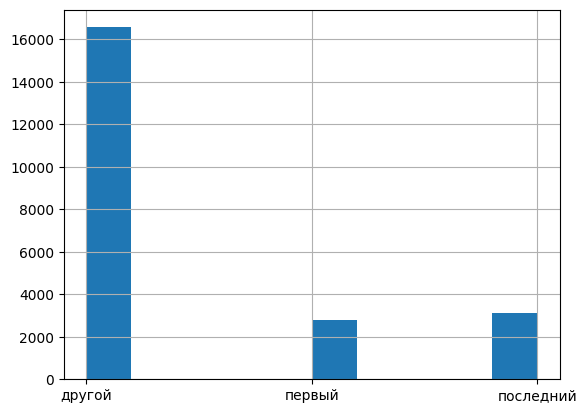

In [109]:
df['floor_type'].hist()

Большая часть квартир находятся не на первых и последних этажах

**общее количество этажей в доме**

<AxesSubplot:>

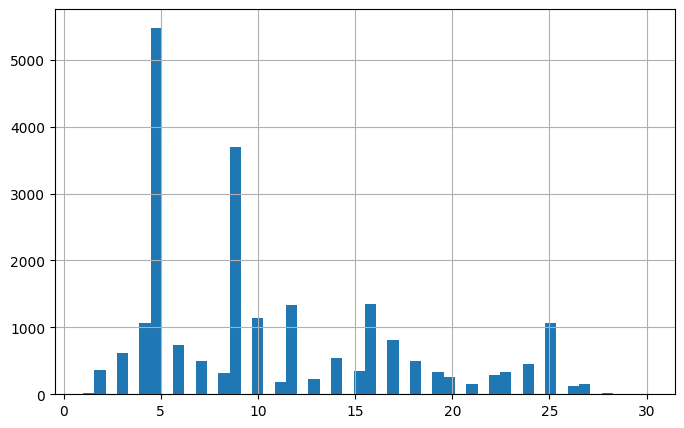

In [110]:

df['floors_total'].hist(bins=50, range=(1, 30), figsize=(8,5))

Форма распределения может быть описана как «случайная», пики приходятся на 5 этажные здания, 8 этажные здания, 17 и 25 этажные

**расстояние до центра города в метрах**

<AxesSubplot:>

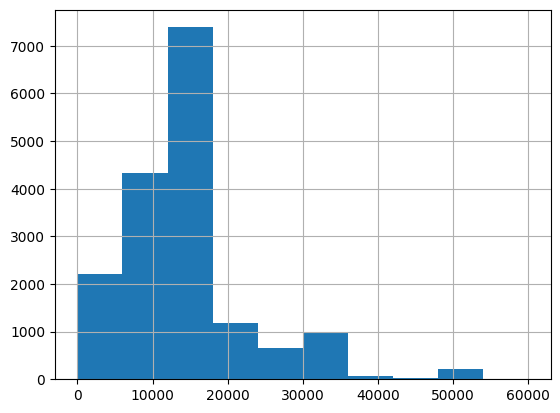

In [111]:
df['cityCenters_nearest'].hist(bins=10, range=(0, 60000))

пик приходится на значения от 10 км до 18 км до центра.

**расстояние до ближайшего аэропорта**

<AxesSubplot:>

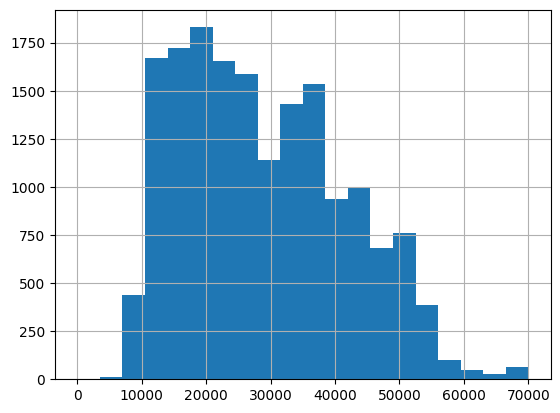

In [112]:
df['airports_nearest'].hist(bins=20, range=(0,70000))

Пик в районе 20 км от аэропорта

**расстояние до ближайшего парка**

19430    3190.0
10959    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64

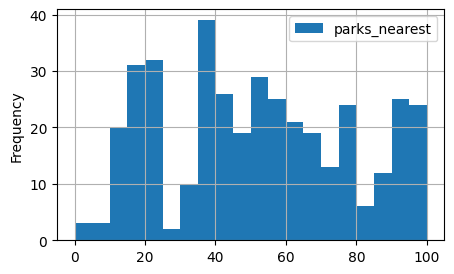

In [113]:
df.plot(y='parks_nearest', kind='hist', bins=20, range=(0,100), grid=True, figsize=(5,3))
df['parks_nearest'].sort_values(ascending=False).head(10)

Максимальное расстояние это чуть больше 3км

**день и месяц публикации объявления**

<AxesSubplot:>

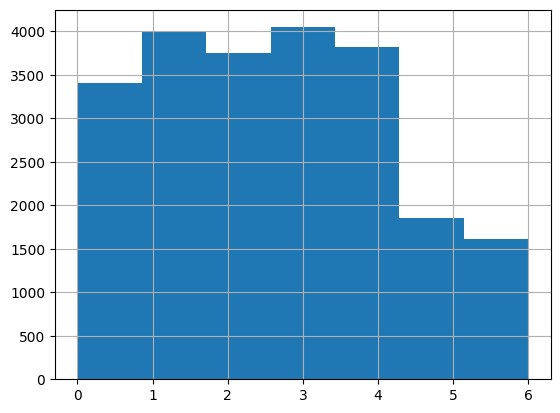

In [114]:
#день
df['weekday_exposition'].hist(bins=7)

Больше объявлений размещают в рабочие дни до пятницы

<AxesSubplot:>

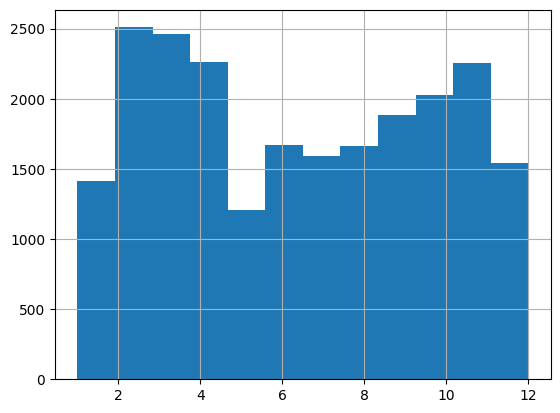

In [115]:
#Месяц
df['month_exposition'].hist(bins=12)

Больше всего публикаций в Марте, Апреле, сентябре, октябре, ноябре

# example 1

#### example 3

##### example 4

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий</b></font>
<br /> 
<font size="3", color = "black">
<br />
стоит выделять разделы проекта заголовками разного уровня, за уровень отвечает количество знаков #
    
        # example 1

        #### example 3

        ##### example 4
    
    

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление**
 
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. 
- Какие продажи можно считать быстрыми, а какие — необычно долгими?

<AxesSubplot:ylabel='Frequency'>

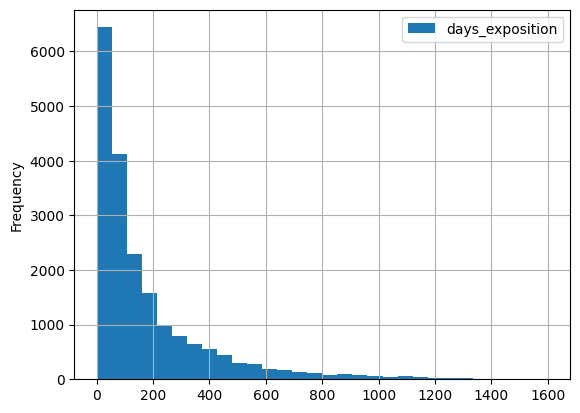

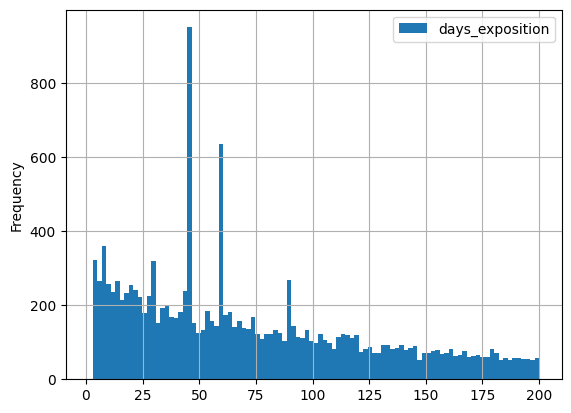

In [116]:
df.plot(y = 'days_exposition', kind='hist', bins=30, grid=True, range=(1, 1600))
df.plot(y = 'days_exposition', kind='hist', bins=100, grid=True, range=(1, 200))

In [117]:
print(df['days_exposition'].mean())

176.08075328795866


Посчитаем среднее. Получаем 176

In [118]:
print(df['days_exposition'].median())

93.0


Посчитаем медиану. Получаем 93

In [119]:
df[df['days_exposition']!=0].median().round()

/var/folders/3y/9g66ffzn3pqgvjmly0907bcr0000gn/T/ipykernel_18970/3075711684.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['days_exposition']!=0].median().round()


total_images                 9.0
last_price             4550000.0
total_area                  51.0
rooms                        2.0
ceiling_height               3.0
floors_total                 9.0
living_area                 30.0
floor                        4.0
is_apartment                 0.0
studio                       0.0
open_plan                    0.0
kitchen_area                 9.0
balcony                      0.0
airports_nearest         27122.0
cityCenters_nearest      13313.0
parks_around3000             0.0
parks_nearest              455.0
ponds_around3000             0.0
ponds_nearest              503.0
days_exposition             93.0
one_meter_price          94139.0
weekday_exposition           3.0
month_exposition             6.0
year_exposition           2017.0
distance_to_centre          13.0
dtype: float64

In [120]:
df['days_exposition'].describe()

count    19541.000000
mean       176.080753
std        211.780251
min          3.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1355.000000
Name: days_exposition, dtype: float64

**ВЫВОД** \

Наблюдаются пики в диапозоне от 0 до 100 дней. Лучше использовать медианной значение, так как на средне сильно влияют такие пики. Обычно продаже осуществляются до 80 дней.

Обычно продажа осуществляется за 95 дней, быстрыми можно считать продажи до 44 дней, долгими можно считать продажи более 225 дней

**3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?**
 Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

**Найдем связь между last_price и total_area**

0.7771674187216286


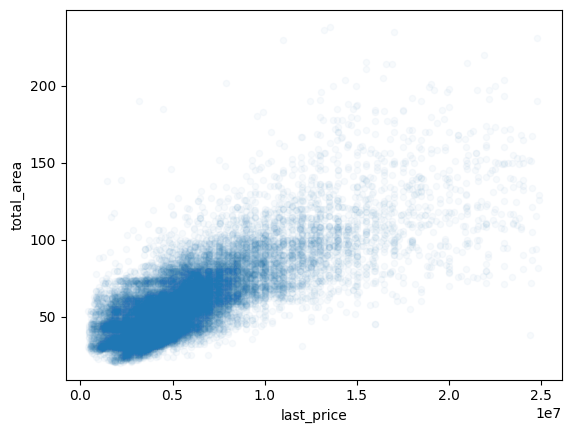

In [121]:
df.sort_values('total_area').plot(x='last_price', y='total_area', kind='scatter', alpha=0.03)
print(df['total_area'].corr(df['last_price']))

Очевидно, что корреляция присутствует. Коэф. пирсона 0,77 (1 это максимальное знаечние, которое обозначает прямую зависимость)

**Найдем связь между last_price и living_area**

0.6605482555386472


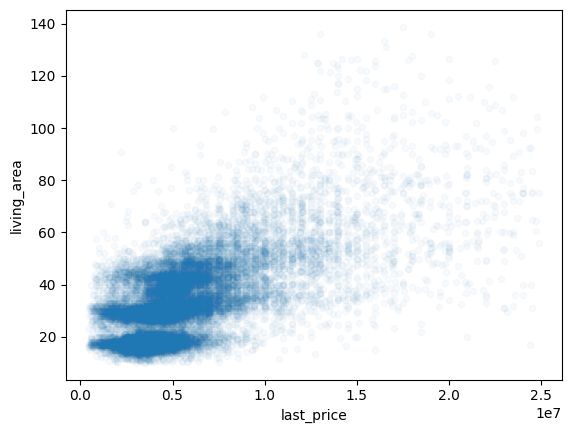

In [122]:
df.sort_values('living_area').plot(x='last_price', y='living_area', kind='scatter', alpha=0.03)
print(df['living_area'].corr(df['last_price']))

Связь есть, но не сильная. Коэф. пирсона 0,66

**Найдем связь между last_price и kitchen_area**

0.5955504629977552


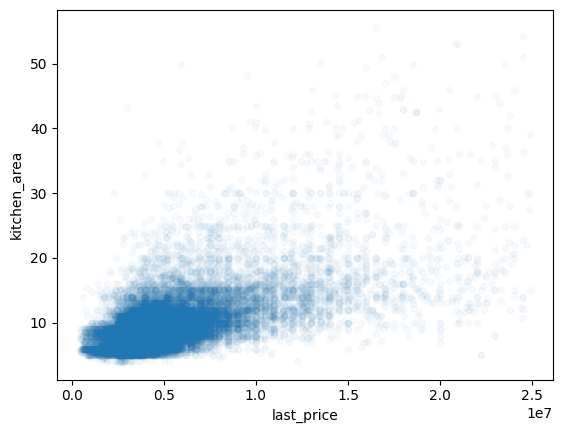

In [123]:
df.sort_values('kitchen_area').plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.03)
print(df['kitchen_area'].corr(df['last_price']))

Связь есть, но не сильная. Коэф. пирсона 0,59

**Найдем связь между last_price и rooms**

            last_price    rooms
last_price     1.00000  0.55732
rooms          0.55732  1.00000 



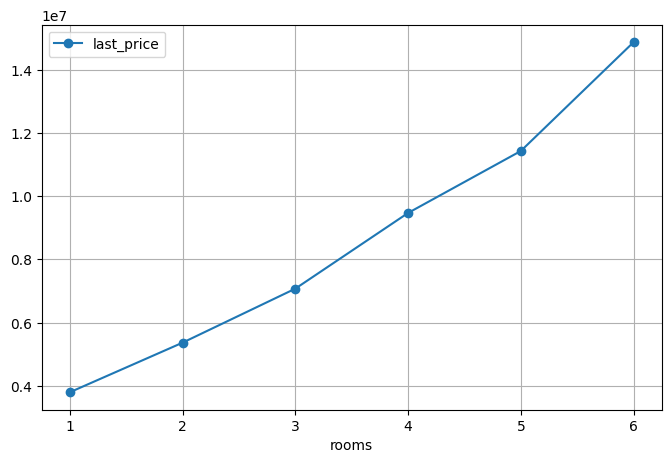

In [124]:
df.query('rooms > 0').pivot_table(index='rooms', values='last_price') \
    .plot(grid=True, style='o-', figsize=(8, 5))
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')


Связь прослеживается

**Найдем связь между last_price и floor_type**

<AxesSubplot:xlabel='floor_type'>

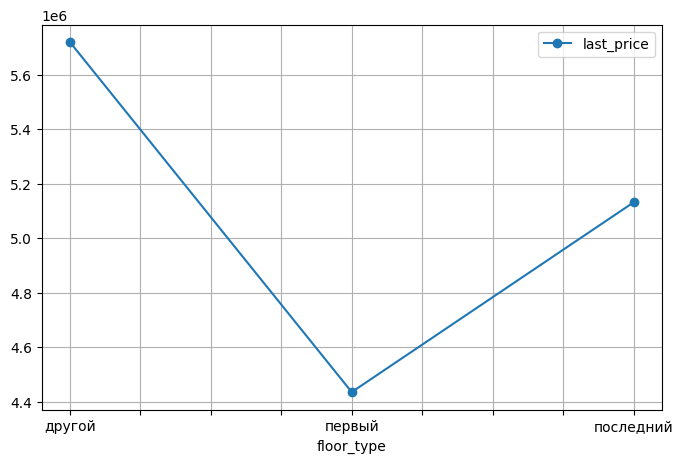

In [125]:

df.pivot_table(index='floor_type', values='last_price') \
    .plot(grid=True, style='o-', figsize=(8, 5))


на первом и последнем этажах квартиры в среднем стоят дешевле, чем на другом. На первом наиболее дешевые квартиры

**Найдем связь между weekday_exposition, month_exposition, year_exposition и floor_type**

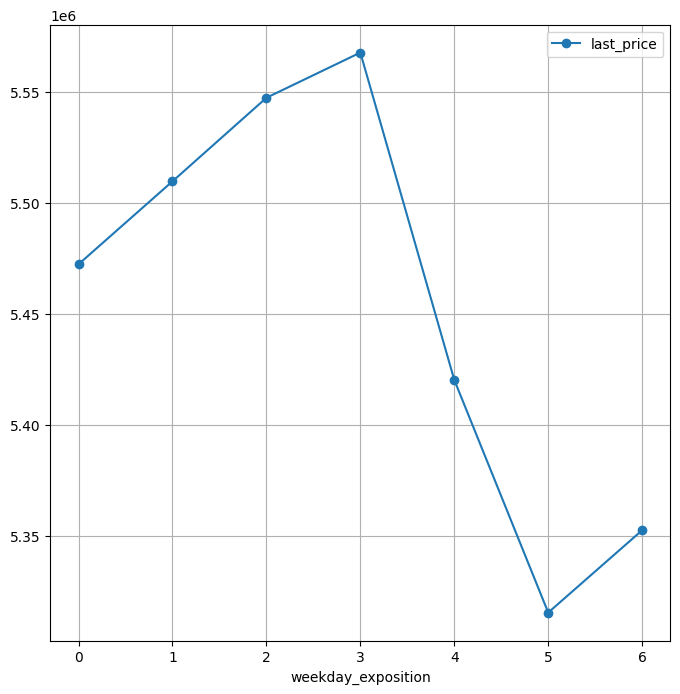

In [126]:
df.pivot_table(index='weekday_exposition', values='last_price') \
    .plot(grid=True, style='o-', figsize=(8,8));

Пиковое значение приходится на начало недели, особенно на сразу. Может бюыть потому что в средуц приходит аванс по зп

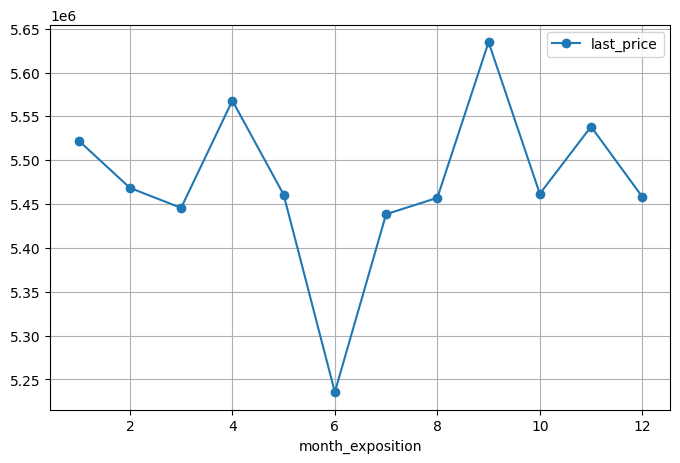

In [127]:
df.pivot_table(index='month_exposition', values='last_price') \
    .plot(grid=True, style='o-', figsize=(8,5));

Пиковые значения в конце года, покупка может быть обоснована накоплениями покупателей квартир плюс получение годовых премий

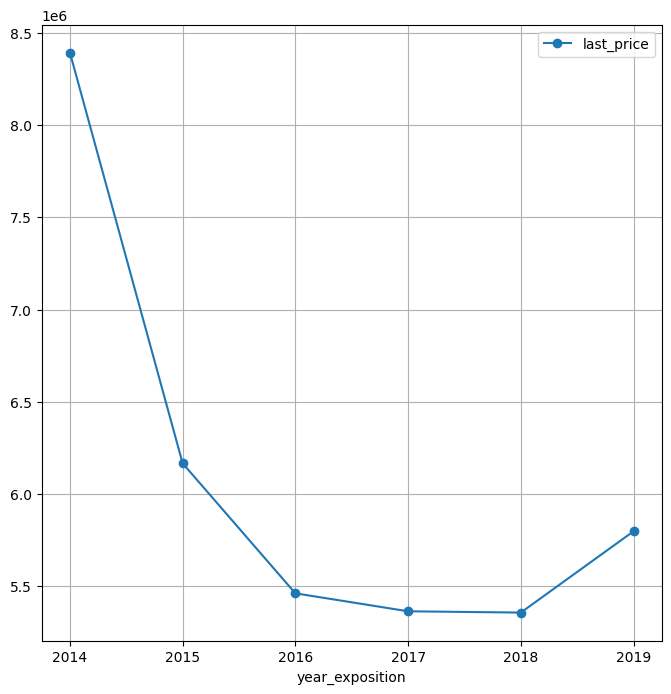

In [128]:
df.pivot_table(index='year_exposition', values='last_price') \
    .plot(grid=True, style='o-', figsize=(8,8));

Самая высокая цена в 2014 году после кризиса, резко повысился спрос на недвижимость и повышением курса валют.

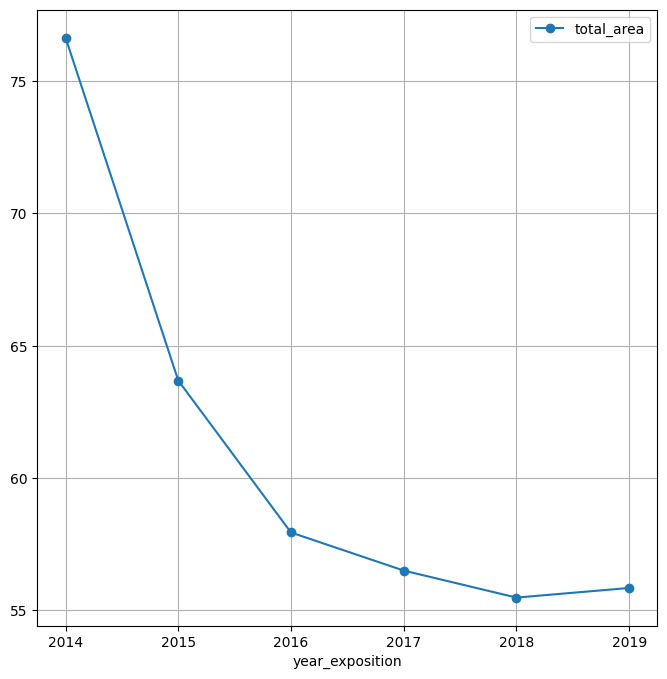

In [129]:
df.pivot_table(index='year_exposition', values='total_area') \
    .plot(grid=True, style='o-', figsize=(8,8));

В дополнение к вышесказанному, видим, что с годами площадь квартир становится гараздо меньше, что также давит на цены

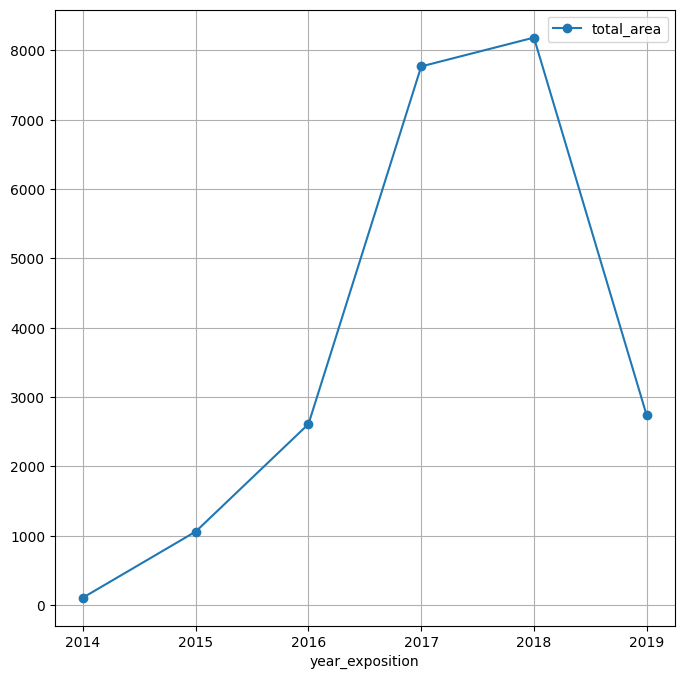

In [130]:
df.pivot_table(index='year_exposition', values='total_area', aggfunc='count') \
    .plot(grid=True, style='o-', figsize=(8,8));

Предложение квартир на рынке сильно увеличилось

**Таким образом, охлаждение спроса после кризиса, уменьше площади квартир и увеличение предложения на рынке в совокупности привело к снижению цен с годами**

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

In [131]:
avg_sqrm_price_locality_pivot = df.pivot_table(index='locality_name_unique', values='one_meter_price', aggfunc=['count', 'mean'])
avg_sqrm_price_locality_pivot.columns = ['count', 'mean']
avg_sqrm_price_locality_pivot = avg_sqrm_price_locality_pivot.sort_values('count', ascending=False).head(10)
avg_sqrm_price_locality_pivot['mean'] = round(avg_sqrm_price_locality_pivot['mean'])
avg_sqrm_price_locality_pivot

,count,mean
locality_name_unique,,
Санкт-Петербург,14700,109230.0
Мурино,577,85800.0
Кудрово,467,95273.0
Шушары,436,78532.0
Всеволожск,392,68653.0
Пушкин,345,101989.0
Колпино,336,75352.0
Парголово,325,90133.0
Гатчина,305,68811.0


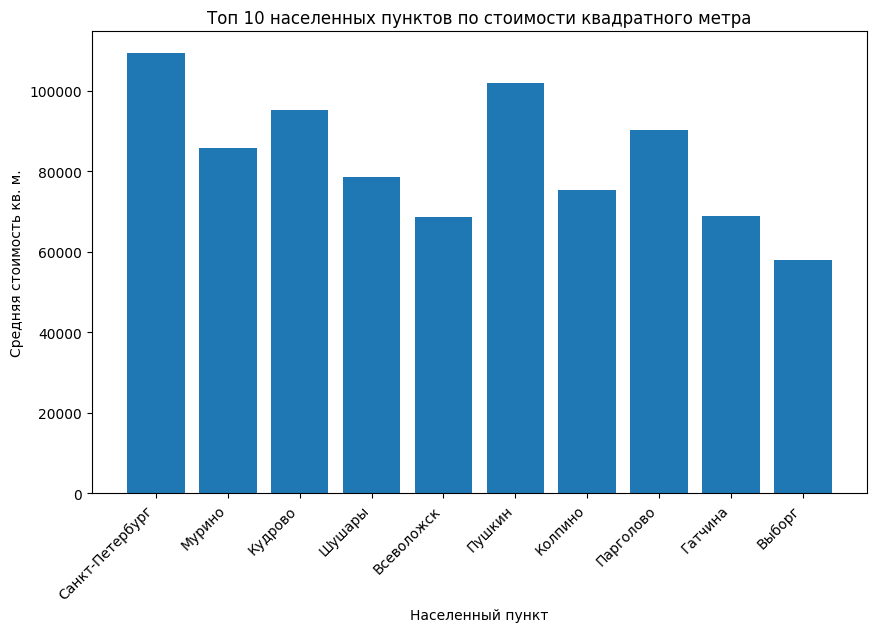

In [133]:
plt.figure(figsize=(10, 6))
plt.bar(avg_sqrm_price_locality_pivot.index, avg_sqrm_price_locality_pivot['mean'])
plt.title('Топ 10 населенных пунктов по стоимости квадратного метра')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя стоимость кв. м.')
plt.xticks(rotation=45, ha='right')
plt.show()

**Самая высокая стоимость**

In [146]:
avg_sqrm_price_locality_pivot.loc[avg_sqrm_price_locality_pivot['mean'] == avg_sqrm_price_locality_pivot['mean'].max()]

,count,mean
locality_name_unique,,
Санкт-Петербург,14700,109230.0


**Самая низкая стоимость**

In [147]:
avg_sqrm_price_locality_pivot.loc[avg_sqrm_price_locality_pivot['mean'] == avg_sqrm_price_locality_pivot['mean'].min()]

,count,mean
locality_name_unique,,
Выборг,226,57923.0


**Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [148]:

to_centr_spb = df[df['locality_name'] == 'Санкт-Петербург'].sort_values('one_meter_price')
to_centr_spb.groupby('cityCenters_nearest').median('one_meter_price')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,weekday_exposition,month_exposition,year_exposition,distance_to_centre
cityCenters_nearest,,,,,,,,,,,,,,,,,,,,,,,,
287.0,18.0,9590000.0,108.0,2.0,3.300,5.0,59.00,2.0,0.0,0.0,0.0,11.00,0.0,21908.0,3.0,359.0,3.0,290.0,69.0,88796.296296,1.0,5.0,2017.0,0.0
329.0,3.0,7200000.0,72.0,2.0,3.070,3.0,44.90,2.0,0.0,0.0,0.0,12.30,0.0,21875.0,3.0,426.0,3.0,273.0,89.0,100000.000000,3.0,12.0,2017.0,0.0
387.0,10.0,13500000.0,96.9,3.0,3.200,7.0,67.30,3.0,0.0,0.0,0.0,14.80,0.0,21982.0,3.0,138.0,2.0,657.0,14.0,139318.885449,0.0,8.0,2018.0,0.0
399.0,20.0,7200000.0,80.0,3.0,2.800,4.0,43.00,1.0,0.0,0.0,0.0,8.00,0.0,21832.0,3.0,415.0,2.0,516.0,11.0,90000.000000,3.0,8.0,2017.0,0.0
410.0,3.0,8000000.0,106.0,3.0,3.400,4.0,NaN,1.0,0.0,0.0,0.0,NaN,0.0,21653.0,3.0,591.0,2.0,38.0,60.0,75471.698113,3.0,7.0,2018.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28018.0,0.0,4072000.0,43.0,1.0,2.650,5.0,18.00,2.0,0.0,0.0,0.0,12.00,1.0,46919.0,0.0,455.0,0.0,503.0,285.0,80375.000000,2.0,10.0,2015.0,28.0
28109.0,0.0,7600000.0,111.0,3.0,3.000,16.0,63.00,12.0,0.0,0.0,0.0,14.00,2.0,24685.0,1.0,185.0,2.0,72.0,66.0,68468.468468,2.0,7.0,2017.0,28.0
28644.0,13.0,4775000.0,56.5,2.5,2.625,5.0,32.85,1.0,0.0,0.0,0.0,7.75,1.0,14072.0,0.0,455.0,0.0,503.0,301.0,85191.334598,1.0,5.5,2016.5,29.0


In [149]:
to_centr_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,one_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,distance_to_centre
17753,12,1800000.0,117.3,2016-02-18,5,2.65,4.0,23.60,2,False,False,False,12.90,0,Санкт-Петербург,24670.0,5238.0,0,455.0,0,503.0,139.0,Санкт-Петербург,15345.268542,3,2,2016,другой,5.0
19952,7,2200000.0,138.7,2016-06-24,4,2.65,7.0,90.70,5,False,False,False,13.70,0,Санкт-Петербург,25221.0,4069.0,0,455.0,2,653.0,203.0,Санкт-Петербург,15861.571738,4,6,2016,другой,4.0
21338,15,3200000.0,190.0,2016-06-16,1,3.00,6.0,43.00,4,False,False,False,13.00,0,Санкт-Петербург,22592.0,4312.0,1,350.0,0,503.0,11.0,Санкт-Петербург,16842.105263,3,6,2016,другой,4.0
23394,10,1600000.0,92.0,2018-07-10,3,3.00,6.0,13.00,1,False,False,False,10.00,0,Санкт-Петербург,20881.0,4465.0,1,937.0,3,167.0,3.0,Санкт-Петербург,17391.304348,1,7,2018,первый,4.0
4248,8,1200000.0,49.1,2018-10-21,4,2.50,5.0,36.90,1,False,False,False,5.20,0,Санкт-Петербург,17539.0,12313.0,0,455.0,0,503.0,44.0,Санкт-Петербург,24439.918534,6,10,2018,первый,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,5,17860000.0,55.0,2016-03-15,2,2.65,7.0,NaN,5,False,False,False,NaN,0,Санкт-Петербург,24416.0,4984.0,3,335.0,0,503.0,128.0,Санкт-Петербург,324727.272727,1,3,2016,другой,5.0
22635,5,24432000.0,71.9,2018-01-19,2,2.73,20.0,39.71,13,False,False,False,13.74,0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,269.0,Санкт-Петербург,339805.285118,4,1,2018,другой,10.0
10193,9,16000000.0,45.0,2019-02-25,1,2.95,8.0,NaN,8,False,False,False,NaN,0,Санкт-Петербург,24651.0,5331.0,2,529.0,0,503.0,NaN,Санкт-Петербург,355555.555556,0,2,2019,последний,5.0
4713,11,16000000.0,45.0,2018-07-14,2,2.65,8.0,29.00,4,False,False,False,7.00,0,Санкт-Петербург,25476.0,4324.0,1,634.0,3,458.0,102.0,Санкт-Петербург,355555.555556,5,7,2018,другой,4.0


<AxesSubplot:xlabel='distance_to_centre'>

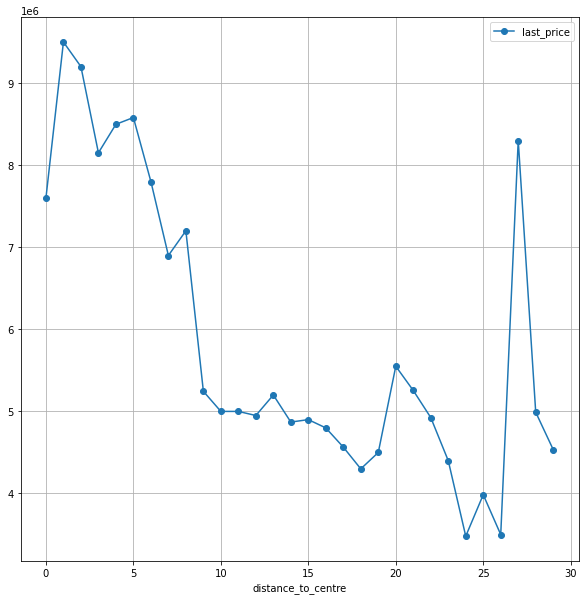

In [150]:
to_centr_spb.pivot_table(index='distance_to_centre', values='last_price', aggfunc='median') \
    .plot(grid=True, style='o-', figsize=(10, 10))

In [151]:
spb_pivot = to_centr_spb.pivot_table(index='distance_to_centre', columns='floor_type', values='last_price', aggfunc='count')
print(spb_pivot)


floor_type          другой  первый  последний
distance_to_centre                           
0.0                    4.0     2.0        2.0
1.0                   76.0    21.0       36.0
2.0                  115.0    36.0       60.0
3.0                  171.0    45.0       69.0
4.0                  406.0    70.0       88.0
5.0                  563.0    72.0      109.0
6.0                  371.0    56.0       70.0
7.0                  260.0    28.0       53.0
8.0                  451.0    50.0       62.0
9.0                  438.0    51.0       83.0
10.0                 531.0    74.0       93.0
11.0                 891.0   142.0      114.0
12.0                1259.0   176.0      151.0
13.0                1177.0   114.0      142.0
14.0                1032.0   106.0      121.0
15.0                1255.0   147.0      139.0
16.0                1002.0   125.0      122.0
17.0                 674.0   100.0       86.0
18.0                 205.0    23.0       30.0
19.0                 119.0    18.0

In [152]:
spb_pivot = to_centr_spb.pivot_table(index=['distance_to_centre','floor_type'], values='last_price', aggfunc='count')
spb_pivot.head(30)

last_price
distance_to_centre floor_type            
0.0                другой               4
                   первый               2
                   последний            2
1.0                другой              76
                   первый              21
                   последний           36
2.0                другой             115
                   первый              36
                   последний           60
3.0                другой             171
                   первый              45
                   последний           69
4.0                другой             406
                   первый              70
                   последний           88
5.0                другой             563
                   первый              72
                   последний          109
6.0                другой             371
                   первый              56
                   последний           70
7.0                другой             260
                   первый              28
                   последний           53
8.0                другой             451
                   первый              50
                   последний           62
9.0                другой             438
                   первый              51
                   последний           83

**видно, что в центре много квартир находится либо на последнем, либо на первом этажах. Я могу предположить, что, так как это исторический фонд, то велика вероятность нахождения именно на этих этажах, так как всего этажей мало**

**Исследум выбросы на 27 км**

In [153]:
spb_pivot.query('distance_to_centre == 27')

last_price
distance_to_centre floor_type            
27.0               другой               1
                   последний            1

**Всего 2 квартира на 27 км. Она на первом этаже, другая на последнем. То есть какой-то двухэтажный дом - пентхаус может быть? поэтому цена подскочила.**

In [154]:
# check
to_centr_spb.query('distance_to_centre == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,one_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,distance_to_centre
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2.0,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0,455.0,0,503.0,178.0,Санкт-Петербург,70312.500000,1,2,2018,последний,27.0
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1,1496.0,0,503.0,128.0,Санкт-Петербург,193918.918919,1,11,2017,другой,27.0


### Общий вывод

**В данном проекте мы исследовали рынок недвижимости в СПБ и соседних населенных пунктах.**
1. Первым делом мы открыли датафрейм, изучили данные, провели предварительный анализ значений.
2. Далее мы проверили предобработку данных - устранили аномалии, дубликаты, пропуски.
3. На третьем этапе мы провели рассчеты и добавили в таблицу новые столбцы: 
- цена квадратного метра, 
- день-месяц-год публикации объявления, 
- тип этажа (первый, последний, другой).
4. На четвертом этапе и провели исследовательский анализ данных. **Изучили ряд параметров с помощью гистограмм**:  - выявили определенные зависимости между параметрами данных, влияющие факторы и тд. 
- выявили, что на цену квартиры влиют такие параметры как: площадь, расстояние от центра, расположенность в населенном пункте. 

**Среди топ 10 населенных пунктов по количеству объявлений самый дорогой квадратный метр в Спб, самый дешевый в Выборге.**

### Вывод

In [134]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

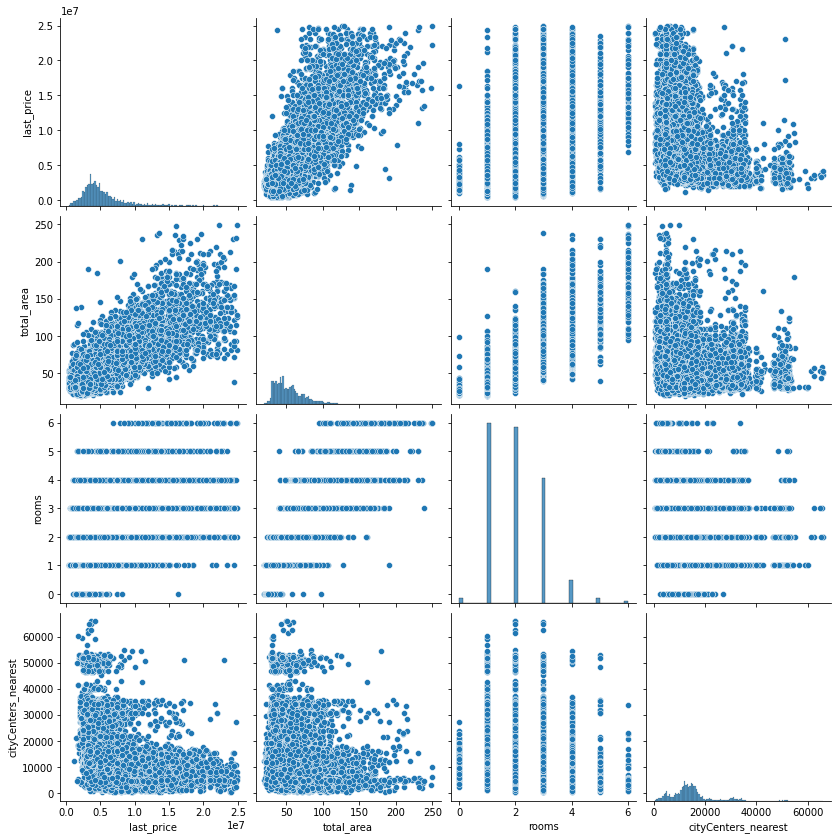

In [156]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


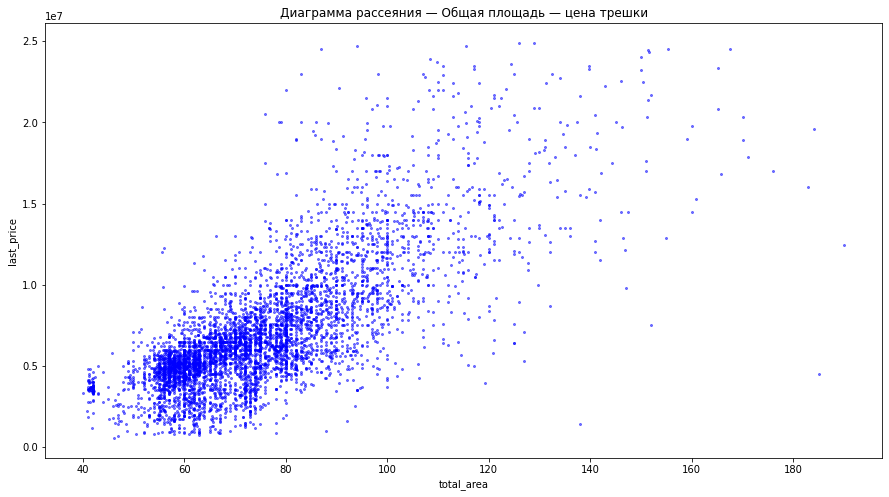

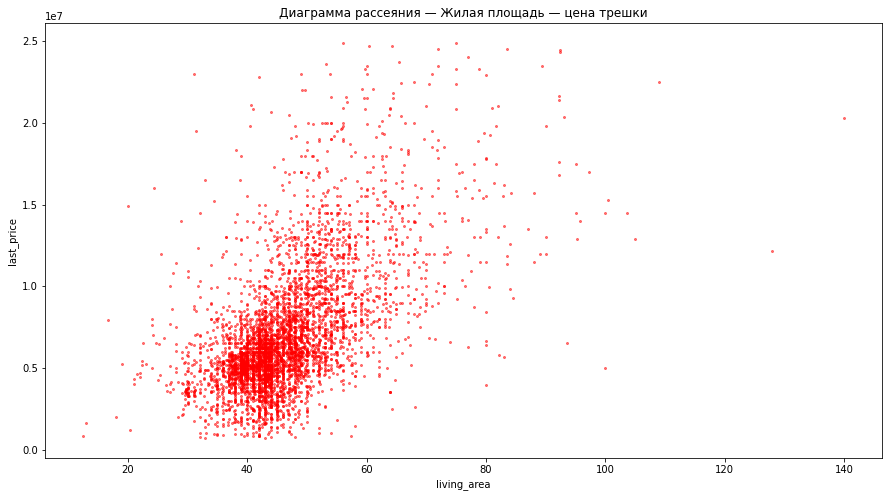

In [157]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

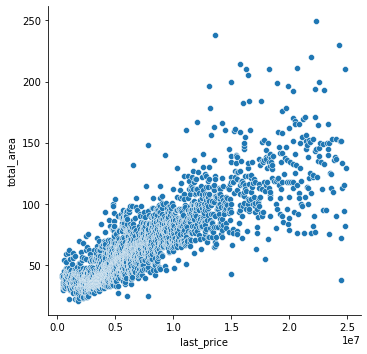

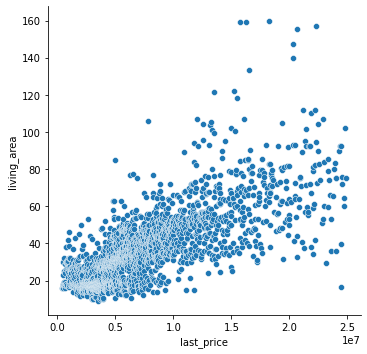

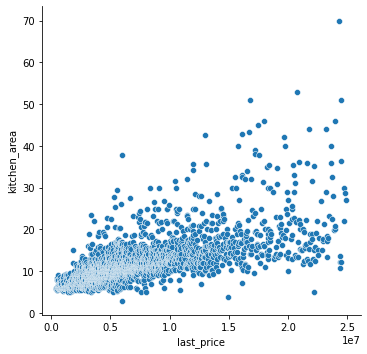

In [158]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

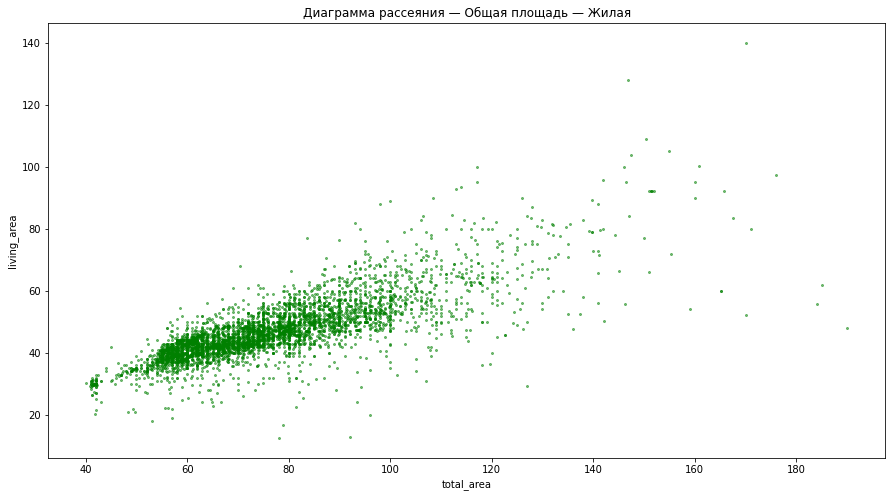

In [159]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

**Чек-лист готовности проекта**



- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод